In [3]:
# download and import pacakges

!pip install netCDF4 xarray
%pip install pandas
%pip install scipy
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Start Code 

## Read in Data

Skipping interpolation at time index 2083: not enough valid points
Skipping interpolation at time index 2084: not enough valid points
Skipping interpolation at time index 3712: not enough valid points
Skipping interpolation at time index 3713: not enough valid points
Skipping interpolation at time index 3714: not enough valid points
Skipping interpolation at time index 3715: not enough valid points
Skipping interpolation at time index 3716: not enough valid points
Skipping interpolation at time index 3717: not enough valid points
Skipping interpolation at time index 3718: not enough valid points
Skipping interpolation at time index 3719: not enough valid points
Skipping interpolation at time index 3720: not enough valid points
Skipping interpolation at time index 3721: not enough valid points
Skipping interpolation at time index 3722: not enough valid points
Skipping interpolation at time index 3723: not enough valid points
Skipping interpolation at time index 3724: not enough valid po

<function matplotlib.pyplot.show(close=None, block=None)>

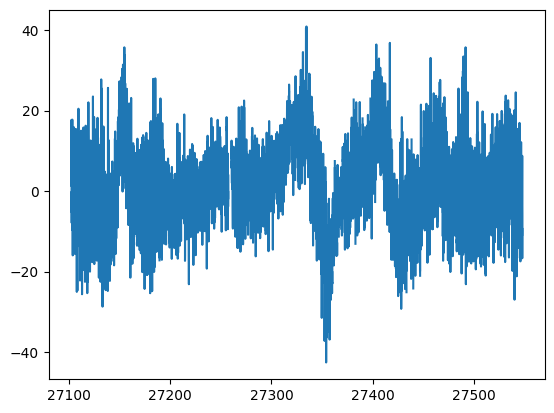

In [6]:

# Read in data from TACOS mooring

import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set file path
# Define the file path
file_path = r'C:\Users\mia.case\internship\code\throughjuneTACOS.nc'

# open file
nc = netCDF4.Dataset(file_path, 'r')

# display variables
#print(nc.variables)



# Read in variables following Renellys' matlab script

# Read in 'TEMP'
tc = nc.variables['TEMP'][:].filled(np.nan)
tc = np.squeeze(tc)

# Read 'DEPTH'
zc = nc.variables['DEPTH'][:]
depthtxt = np.array2string(zc, separator=',') # converts depths to string
zc[2] = 17 # fixed value based on Renellys' code 

# Read in 'TIME'
timec = nc.variables['TIME'][:]

# Read in 'VCUR'
v = nc.variables['VCUR'][:]

# Read in 'UCUR'
u = nc.variables['UCUR'][:]


# Close the file
#nc.close()

# Data corrections from Renellys' matlab script

# NaN out 4th Aquadopp after it gets fixed to the same value 
sensor_idx = 3  # 4th sensor in 0-based indexing
time_idx = 5999  # MATLAB 6000 → Python 5999

# Find time points where sensor 4 equals value at time_idx
it = np.where(tc[:, sensor_idx] == tc[time_idx, sensor_idx])[0]
it = np.where(u[:, sensor_idx] == u[time_idx, sensor_idx])[0]
it = np.where(v[:, sensor_idx] == v[time_idx, sensor_idx])[0]
# Set those time points to NaN for sensor 4
tc[it, sensor_idx] = np.nan
u[it, sensor_idx] = np.nan
v[it, sensor_idx] = np.nan

# NaN out the 3rd Aquadopp after it gets fixed to the same value 
sensor_idx = 2  # 3rd sensor
time_idx = 6640  # MATLAB 6641 → Python 6640

it = np.where(tc[:, sensor_idx] == tc[time_idx, sensor_idx])[0]
it = np.where(u[:, sensor_idx] == tc[time_idx, sensor_idx])[0]
it = np.where(v[:, sensor_idx] == tc[time_idx, sensor_idx])[0]
tc[it, sensor_idx] = np.nan
u[it, sensor_idx] = np.nan
v[it, sensor_idx] = np.nan


# Throw out bad values less than 10 (set to NaN)
tc[tc < 10] = np.nan

# Save original copy before gap filling
tc_orig = tc.copy()


# Clean all inputs                              # I had to clean the inputs because running fillnan was causing errors due to the arrays not being standard arrays 
if isinstance(tc, np.ma.MaskedArray):           # checks if tc is a masked array, because many of the below functions can't handle masked arrays 
    tc = tc.filled(np.nan)                      # if it is masked, this will replace the masked values with NaNs again 
tc = np.asarray(tc)                             # Guarantees that the given data are all standard arrays so they can be handled later 
timec = np.asarray(timec)                       
zc = np.asarray(zc)


tc = fillnan_tacos_38W(timec, zc, tc, 48)       # call fillnan to fillnan '''

max_val = np.max(u[:, 0])
max_index = np.argmax(u)
print("Max value:", max_val)
print("At index:", max_index)

max_val = np.max(v)
max_index = np.argmax(v)
print("Max value:", max_val)
print("At index:", max_index)

print(v[10669, 2])
print(v.shape)

plt.plot(timec, v[:, 9])
plt.show

In [7]:
'''def fillnan_tacos_38W(t, z, vel, tempgap):
    import numpy as np
    from scipy.interpolate import interp1d

    vi = vel.copy()
    nt, nz = vi.shape
    half_window = tempgap // 2  # integer division

    # Step 1: Horizontal (time-wise) interpolation
    vi_filled = vi.copy()

    for iz in range(nz):  # loop over depths
        for it in range(half_window, nt - half_window):
            win_inds = slice(it - half_window, it + half_window + 1)
            ttmp = t[win_inds]
            vtmp = vi_filled[win_inds, iz]
            good = ~np.isnan(vtmp)

            if np.any(good) and np.sum(good) > 1:
                vi_filled[win_inds, iz] = np.interp(ttmp, ttmp[good], vtmp[good])

    # Step 2: Vertical (depth-wise) interpolation
    vi2 = vi_filled.copy()

    for it in range(nt):  # loop over time steps
        vtmp = vi2[it, :]           # velocity at current time across depths
        good = ~np.isnan(vtmp)      # mask of valid data

        ztmp = z[good]              # valid depths
        vtmp_valid = vtmp[good]     # valid velocity values

        if len(vtmp_valid) > 0 and len(ztmp) < nz:
            # Require valid data near both surface and bottom to interpolate
            if np.any(~np.isnan(vi2[it, :3])) and np.any(~np.isnan(vi2[it, -3:])):
                vi2[it, :] = np.interp(z, ztmp, vtmp_valid)

    return vi2'''






'def fillnan_tacos_38W(t, z, vel, tempgap):\n    import numpy as np\n    from scipy.interpolate import interp1d\n\n    vi = vel.copy()\n    nt, nz = vi.shape\n    half_window = tempgap // 2  # integer division\n\n    # Step 1: Horizontal (time-wise) interpolation\n    vi_filled = vi.copy()\n\n    for iz in range(nz):  # loop over depths\n        for it in range(half_window, nt - half_window):\n            win_inds = slice(it - half_window, it + half_window + 1)\n            ttmp = t[win_inds]\n            vtmp = vi_filled[win_inds, iz]\n            good = ~np.isnan(vtmp)\n\n            if np.any(good) and np.sum(good) > 1:\n                vi_filled[win_inds, iz] = np.interp(ttmp, ttmp[good], vtmp[good])\n\n    # Step 2: Vertical (depth-wise) interpolation\n    vi2 = vi_filled.copy()\n\n    for it in range(nt):  # loop over time steps\n        vtmp = vi2[it, :]           # velocity at current time across depths\n        good = ~np.isnan(vtmp)      # mask of valid data\n\n        ztmp =

In [8]:

def fillnan_tacos_38W(t, z, vel, tempgap):
    import numpy as np
    from scipy.interpolate import interp1d

    vi = vel.copy()                                   # holds copy of v or u data 
    for it in range(vel.shape[0]):                    # number of time stamps in velocity data, iterates over all of them
        vtmp = vel[it, :]                             # vtmp holds the velocity at all depths at the currents time index
        valid = ~np.isnan(vtmp)                       # valid is boolean value and flags non-NaN values 

        # Skip if too few valid points
        if np.sum(valid) < 2:                         # checks to see if there are at least two valid points in the time index to interpolate with 
            print(f"Skipping interpolation at time index {it}: not enough valid points")
            continue

        try:                                          # this checks and makes sure there are at least 2 depth values with valid current at this time index

            f = interp1d(z[valid], vtmp[valid], kind='linear', bounds_error=False, fill_value="extrapolate")        # interpolates over valid data 
            vi[it, :] = f(z)                                                                                        # fill in all values in time step with interpolated data 
        except Exception as e:
            print(f"Interpolation failed at time index {it}: {e}")
            continue

    return vi







In [9]:

'''def fillnan_tacos_38W(t, z, vel, tempgap):
    import numpy as np
    from scipy.interpolate import interp1d

    vi = vel.copy()
    nt, nz = vi.shape
    half_window = tempgap // 2  # integer division

    # Step 1: Horizontal (time-wise) interpolation
    vi_filled = vi.copy()

    for iz in range(nz):  # loop over depths
        for it in range(half_window, nt - half_window):
            win_inds = slice(it - half_window, it + half_window + 1)
            ttmp = t[win_inds]
            vtmp = vi_filled[win_inds, iz]
            good = ~np.isnan(vtmp)

            if np.any(good) and np.sum(good) > 1:
                vi_filled[win_inds, iz] = np.interp(ttmp, ttmp[good], vtmp[good])

    # Step 2: Vertical (depth-wise) interpolation
    vi2 = vi_filled.copy()

    for it in range(nt):
        vtmp = vi2[it, :]
        good = ~np.isnan(vtmp)
        ztmp = z[good]
        vtmp_valid = vtmp[good]

        if len(vtmp_valid) > 0 and len(ztmp) < nz:
            if np.any(~np.isnan(vi2[it, :3])) and np.any(~np.isnan(vi2[it, -3:])):
                vi2[it, :] = np.interp(z, ztmp, vtmp_valid)

    return vi2'''



'def fillnan_tacos_38W(t, z, vel, tempgap):\n    import numpy as np\n    from scipy.interpolate import interp1d\n\n    vi = vel.copy()\n    nt, nz = vi.shape\n    half_window = tempgap // 2  # integer division\n\n    # Step 1: Horizontal (time-wise) interpolation\n    vi_filled = vi.copy()\n\n    for iz in range(nz):  # loop over depths\n        for it in range(half_window, nt - half_window):\n            win_inds = slice(it - half_window, it + half_window + 1)\n            ttmp = t[win_inds]\n            vtmp = vi_filled[win_inds, iz]\n            good = ~np.isnan(vtmp)\n\n            if np.any(good) and np.sum(good) > 1:\n                vi_filled[win_inds, iz] = np.interp(ttmp, ttmp[good], vtmp[good])\n\n    # Step 2: Vertical (depth-wise) interpolation\n    vi2 = vi_filled.copy()\n\n    for it in range(nt):\n        vtmp = vi2[it, :]\n        good = ~np.isnan(vtmp)\n        ztmp = z[good]\n        vtmp_valid = vtmp[good]\n\n        if len(vtmp_valid) > 0 and len(ztmp) < nz:\n      

## Plotting Curent

### Plotting Current Means

#### Annual Current Means

##### Calculate Annual Currnet Means 

In [36]:
# CALCULATE ANNUAL MEANS AT EACH DEPTH OF CURRENTS 

# Determine shapes of variables 
'''
#For previous debugging purposes:
print(f"Zonal current (UCUR) shape: {u.shape}")
print(f"Meridional current (VCUR) shape: {v.shape}")
print(f"Time shape: {timec.shape}")
print(f"Depth shape: {zc.shape}")
'''

# Create a datetime variable variable
from netCDF4 import num2date

time_reference = nc.variables['TIME'].units                     # refer to raw TIME variable in the file 
timec_datetime = num2date(timec, units=time_reference)          # convert timec into a datetime object referring to the original raw units 

# Print the first 5 datetime values directly to check 
#print(timec_datetime[:5])

# Extract date components from the datetime variables
years = [dt.year for dt in timec_datetime]
months = [dt.month for dt in timec_datetime]
days = [dt.day for dt in timec_datetime]
hours = [dt.hour for dt in timec_datetime]
minutes = [dt.minute for dt in timec_datetime]
seconds = [dt.second for dt in timec_datetime]

# Create a DatetimeIndex 
timec_datetime_index = pd.to_datetime({'year': years, 'month': months, 'day': days,
                                        'hour': hours, 'minute': minutes, 'second': seconds})

# Check the first few time values
#print(timec_datetime_index[:5])

# Create arrays in order to calculate annual mean 
annual_mean_u = np.zeros((len(zc), len(np.unique(years))))
annual_mean_v = np.zeros((len(zc), len(np.unique(years))))

# Calculate annual mean
for i, depth in enumerate(zc):                                                                      # for each depth in z 
    for year in np.unique(years):                                                                   # for each unique year 
        year_indices = np.where(np.array(years) == year)[0]                                         # the indexes in the time series with all the same year 
        annual_mean_u[i, np.where(np.unique(years) == year)[0]] = np.mean(u[year_indices, i])       # storing in our mean array, for this depth, the mean of u or v at all year indexes
        annual_mean_v[i, np.where(np.unique(years) == year)[0]] = np.mean(v[year_indices, i])

# Output annual mean ucur and vcur at each depth for testing purposes 
'''
for i, depth in enumerate(zc):
    print(f"Depth: {depth} meters")
    
    # Print the annual means for both UCUR and VCUR at this depth
    print(f"  Annual Mean Zonal Current (UCUR) at depth {depth} meters:")
    print(f"  {annual_mean_u[i, :]}")  # Annual mean zonal current for each year
    
    print(f"  Annual Mean Meridional Current (VCUR) at depth {depth} meters:")
    print(f"  {annual_mean_v[i, :]}")  # Annual mean meridional current for each year
    
    print("-" * 50)  # Separator for readability  
''' 
#print(timec_datetime)

'\nfor i, depth in enumerate(zc):\n    print(f"Depth: {depth} meters")\n\n    # Print the annual means for both UCUR and VCUR at this depth\n    print(f"  Annual Mean Zonal Current (UCUR) at depth {depth} meters:")\n    print(f"  {annual_mean_u[i, :]}")  # Annual mean zonal current for each year\n\n    print(f"  Annual Mean Meridional Current (VCUR) at depth {depth} meters:")\n    print(f"  {annual_mean_v[i, :]}")  # Annual mean meridional current for each year\n\n    print("-" * 50)  # Separator for readability  \n'

##### Plot Annual Current Means 

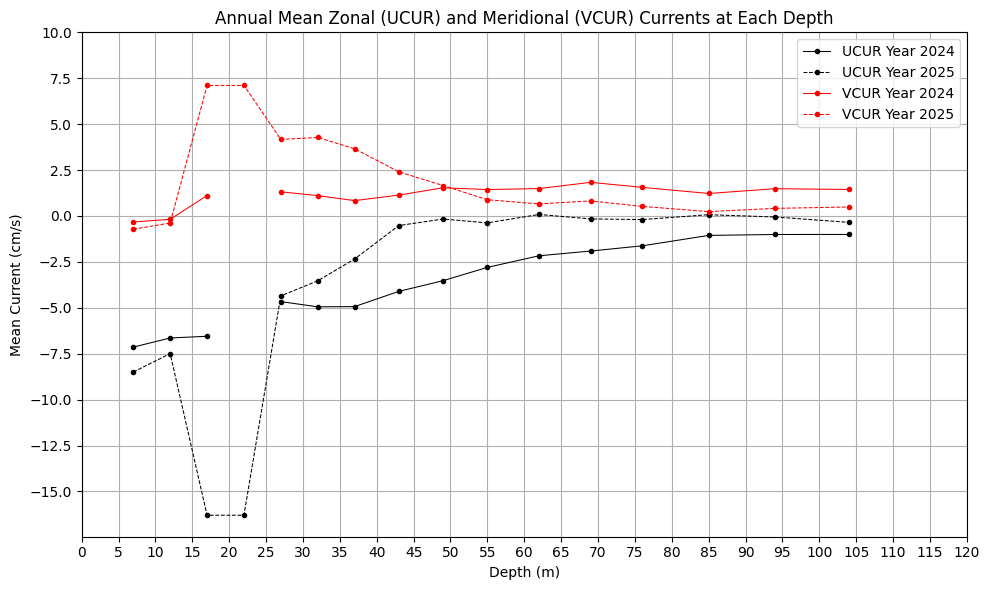

In [37]:

# Now plot the results
plt.figure(figsize=(10, 6))

# Plot UCUR (Zonal Current) - blue
for year_idx, year in enumerate(np.unique(years)):
    if year_idx == 1:                                   # the if statements were used to get the different lines, could be cleaned up later 
        plt.plot(zc, annual_mean_u[:, year_idx], label=f'UCUR Year {year}', marker='o', linestyle='--', color='black', linewidth=.75, markersize=3)
    else:
        plt.plot(zc, annual_mean_u[:, year_idx], label=f'UCUR Year {year}', marker='o', linestyle='-', color='black', linewidth=.75, markersize=3)
# Plot VCUR (Meridional Current) - red
for year_idx, year in enumerate(np.unique(years)):
    if year_idx == 1:
        plt.plot(zc, annual_mean_v[:, year_idx], label=f'VCUR Year {year}', marker='o', linestyle='--', color='red', linewidth=.75, markersize=3)
    else:
        plt.plot(zc, annual_mean_v[:, year_idx], label=f'VCUR Year {year}', marker='o', linestyle='-', color='red', linewidth=.75, markersize=3)

# Add labels and title
plt.xlabel('Depth (m)')
plt.ylabel('Mean Current (cm/s)')  
plt.title('Annual Mean Zonal (UCUR) and Meridional (VCUR) Currents at Each Depth')

# Add a legend
plt.legend()
plt.xticks(np.linspace(0, 120, 25)) 
plt.yticks(np.linspace(-15,10,11))

# Display grid and layout adjustments
plt.grid(True)
plt.tight_layout()
plt.show()


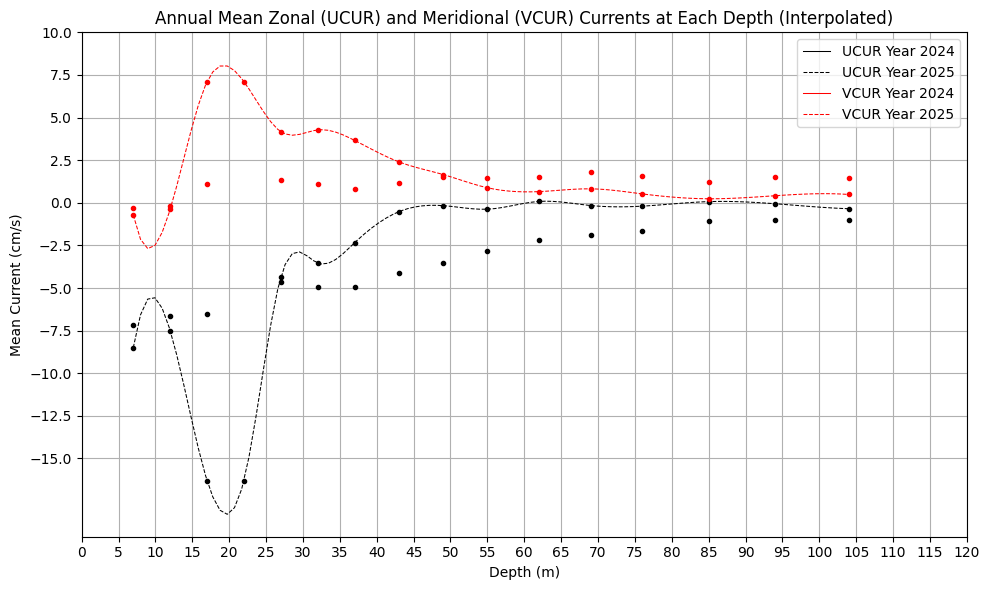

In [38]:
# Annual Mean Values with Interpolation 

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Create a finer depth grid (for interpolation) 
new_depths = np.linspace(zc.min(), zc.max(), 100)  # Interpolating at 100 points between the max and min depths 

# Create interpolating functions for each year's data (ucur and vcur)
interp_u = [interpolate.interp1d(zc, annual_mean_u[:, year_idx], kind='cubic', fill_value="extrapolate") for year_idx in range(len(np.unique(years)))]
interp_v = [interpolate.interp1d(zc, annual_mean_v[:, year_idx], kind='cubic', fill_value="extrapolate") for year_idx in range(len(np.unique(years)))]

# Now plot the results
plt.figure(figsize=(10, 6))

# Plot UCUR (Zonal Current) - blue (with interpolation, no markers)
for year_idx, year in enumerate(np.unique(years)):
    plt.plot(new_depths, interp_u[year_idx](new_depths), label=f'UCUR Year {year}', linestyle='--' if year_idx == 1 else '-', color='black', linewidth=.75)

    # Add markers for the actual data points
    plt.scatter(zc, annual_mean_u[:, year_idx], color='black', marker='o', zorder=5, s=9)

# Plot VCUR (Meridional Current) - red (with interpolation, no markers)
for year_idx, year in enumerate(np.unique(years)):
    plt.plot(new_depths, interp_v[year_idx](new_depths), label=f'VCUR Year {year}', linestyle='--' if year_idx == 1 else '-', color='red', linewidth=.75)

    # Add markers for the actual data points
    plt.scatter(zc, annual_mean_v[:, year_idx], color='red', marker='o', zorder=5, s=9)

# Add labels and title
plt.xlabel('Depth (m)')
plt.ylabel('Mean Current (cm/s)')  
plt.title('Annual Mean Zonal (UCUR) and Meridional (VCUR) Currents at Each Depth (Interpolated)')

# Add a legend
plt.legend()
plt.xticks(np.linspace(0, 120, 25)) 
plt.yticks(np.linspace(-15,10,11))
# Display grid and layout adjustments
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# Graph Analysis:
# Deeper depths show much less variation between the years 
# 2025 saw both a ucur mean and a vcur mean with much larger magnitude than 2025 at depths between 20 and 25 m 
# 2025 current means had much larger magnitude at shallow depths, but lost magnitude much fast than 2024 as it gets deeper
# both years had a mean NW currnet 


#### Monthly Means

##### Calculating Monthly Means 

In [40]:
# CALCULATING THE MONTHLY CURRENT MEANS AT EACH DEPTH 
# NOT USED 

# Create arrays in order to calculate monthly means 
monthly_mean_u = np.zeros((len(zc), len(np.unique(months))))
monthly_mean_v = np.zeros((len(zc), len(np.unique(months))))

# Extract date information from dateetime index
months = timec_datetime_index.dt.month
years = timec_datetime_index.dt.year

#monthly_data = np.zeros((16, 12, 4))
# Calculate annual mean
for i, depth in enumerate(zc):
    for month in np.unique(months):
        month_indices = np.where(np.array(months) == month)[0]
        monthly_mean_u[i, np.where(np.unique(months) == month)[0]] = np.mean(u[month_indices, i])
        monthly_mean_v[i, np.where(np.unique(months) == month)[0]] = np.mean(v[month_indices, i])

        

# Print table with data
'''
for i, depth in enumerate(zc):
    print(f"Depth: {depth} meters")
    
    # Print the annual means for both UCUR and VCUR at this depth
    print(f"  Monthly mean Zonal Current (UCUR) at depth {depth} meters:")
    print(f"  {monthly_mean_u[i, :]}")  # Annual mean zonal current for each year
    
    print(f"  Annual Mean Meridional Current (VCUR) at depth {depth} meters:")
    print(f"  {monthly_mean_v[i, :]}")  # Annual mean meridional current for each year
    
    print("-" * 50)  # Separator for readability 
''' 


'\nfor i, depth in enumerate(zc):\n    print(f"Depth: {depth} meters")\n\n    # Print the annual means for both UCUR and VCUR at this depth\n    print(f"  Monthly mean Zonal Current (UCUR) at depth {depth} meters:")\n    print(f"  {monthly_mean_u[i, :]}")  # Annual mean zonal current for each year\n\n    print(f"  Annual Mean Meridional Current (VCUR) at depth {depth} meters:")\n    print(f"  {monthly_mean_v[i, :]}")  # Annual mean meridional current for each year\n\n    print("-" * 50)  # Separator for readability \n'

In [41]:
# Redone using resample method, this is used to make the below graphs 

# Step 1: Create DataFrames for resampling in the shape (time, depth)
df_u = pd.DataFrame(u, index=timec_datetime_index)  
df_v = pd.DataFrame(v, index=timec_datetime_index)

# Step 2: Resample to monthly means
monthly_mean_u_df = df_u.resample('ME').mean()  # resample(M) will group data into months, .mean() will average them all 
monthly_mean_v_df = df_v.resample('ME').mean()  # shape (numners of months, depth) 

# Step 3: Transpose to be (depth, time)
monthly_mean_u = monthly_mean_u_df.to_numpy().T  # write back into a standard numpy array 
monthly_mean_v = monthly_mean_v_df.to_numpy().T




##### Plot Monthly Averages

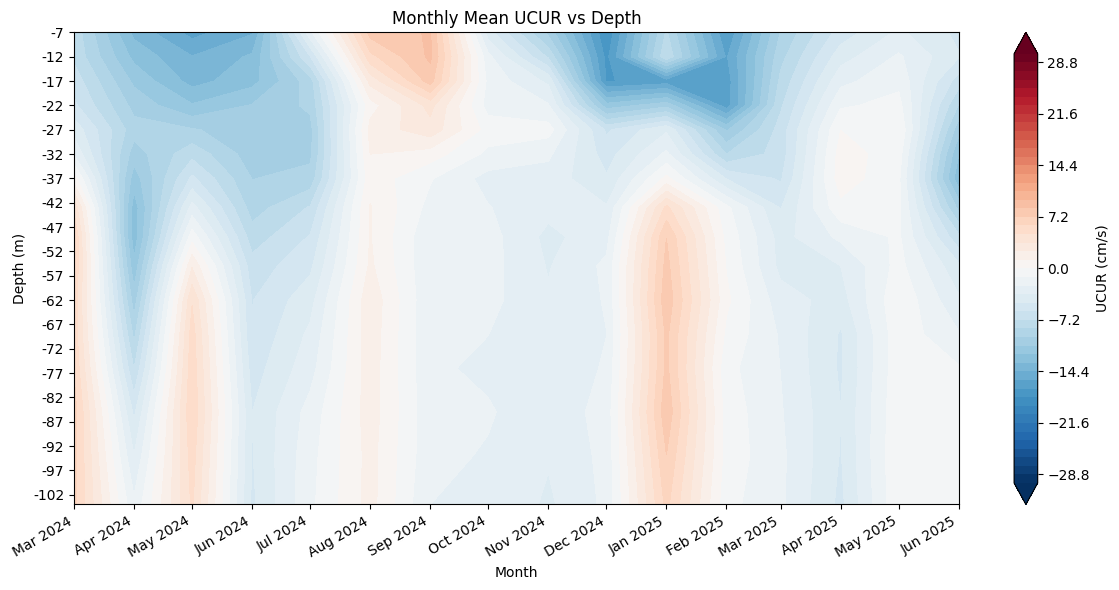

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import cftime

# Plot UCUR Monthly Averages 

n_months = monthly_mean_u.shape[1]       # get number of months from array

start_cftime = cftime.DatetimeGregorian(2024, 3, 15, 19, 0, 0, 0, has_year_zero=False)  # set the start time to the time the data started March 15, 2024 (found from data variable list)

start_date = pd.Timestamp(year=start_cftime.year, month=start_cftime.month, day=1)  # convert start cftime to a pandas timestamp

month_starts = pd.date_range(start=start_date, periods=n_months, freq='MS')     # creates sequence of months starting at the starting timestamp

t_numeric_months = mdates.date2num(month_starts)        # convert each months from above to numeric format for plotting 

# renamed for ease and because I kept forgetting
z = zc

vel_input_monthly_u = monthly_mean_u.T  # transpose because fillnan needs it in (months, depths) 

# Apply the NaN-filling function
monthly_mean_u_filled = fillnan_tacos_38W(t_numeric_months, z, vel_input_monthly_u, tempgap=2)

# Transpose back to (depth, n_months) for plotting purposes 
monthly_mean_u_filled = monthly_mean_u_filled.T


# Create meshgrid for plotting
MONTHS, DEPTHS = np.meshgrid(mdates.date2num(month_starts), zc)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(-30, 30, 51)           # can be adjusted to adjust contour levels on graph !!!

contour = ax1.contourf(MONTHS, DEPTHS, monthly_mean_u_filled, levels=levels, cmap=cmap, extend='both')


ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Month')
ax1.set_title('Monthly Mean UCUR vs Depth')

# Set y-axis limits and ticks for depth
ax1.set_ylim(7, 104)  
ax1.set_yticks(np.arange(7, 105, 5))
ax1.set_yticklabels([f"-{int(tick)}" for tick in np.arange(7, 105, 5)])

# Invert y-axis to have depth increasing downward
ax1.invert_yaxis()


# Format x-axis dates
# Format x-axis as dates with a tick for every month
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator())        # Tick every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Mar 2024"
fig.autofmt_xdate()  # Auto-rotate labels for better fit


cbar = fig.colorbar(contour, ax=ax1, orientation='vertical')
cbar.set_label('UCUR (cm/s)')

plt.tight_layout()
plt.show()



In [51]:
# Graph Analysis 
# UCUR represents west-east currents with positive being eastward
# Strong westward current sept 2024 - dec 2024 at depths between 15 and 25 meters 
# Mainly westward currents overall 
# Shallower depths (until 42 meters down) show mostly westward currents except for august- mid sept 2024
# spike of eastwrad currents from the deepest region going up to around 42 meters down during mar 24, may 24, and mid dec24-mid jan 25

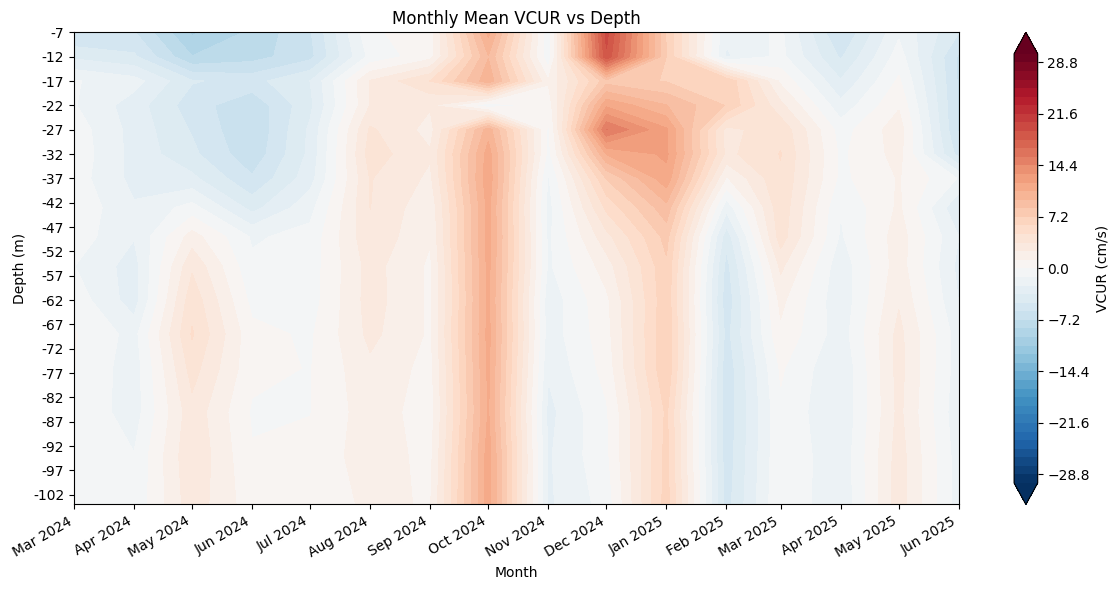

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import cftime

# Plot VCUR Monthly Averages 

# Prepare inputs
n_months = monthly_mean_v.shape[1]       # get number of months from array

start_cftime = cftime.DatetimeGregorian(2024, 3, 15, 19, 0, 0, 0, has_year_zero=False)  # set the start time to the time the data started March 15, 2024 (found from data variable list)

start_date = pd.Timestamp(year=start_cftime.year, month=start_cftime.month, day=1)  # convert start cftime to a pandas timestamp

month_starts = pd.date_range(start=start_date, periods=n_months, freq='MS')     # creates sequence of months starting at the starting timestamp

t_numeric_months = mdates.date2num(month_starts)        # convert each months from above to numeric format for plotting 

# renamed for ease and because I kept forgetting
z = zc

vel_input_monthly_v = monthly_mean_v.T  # transpose because fillnan needs it in (months, depths) 

# Apply the NaN-filling function
monthly_mean_v_filled = fillnan_tacos_38W(t_numeric_months, z, vel_input_monthly_v, tempgap=2)

# Transpose back to (depth, n_months) for plotting purposes 
monthly_mean_v_filled = monthly_mean_v_filled.T

# Create meshgrid for plotting
MONTHS, DEPTHS = np.meshgrid(mdates.date2num(month_starts), zc)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(-30, 30, 51)

contour = ax1.contourf(MONTHS, DEPTHS, monthly_mean_v_filled, levels=levels, cmap=cmap, extend='both')


ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Month')
ax1.set_title('Monthly Mean VCUR vs Depth')

# Set y-axis limits and ticks for depth
ax1.set_ylim(7, 104)  # Note: since we invert y-axis, 7 is top and 104 bottom
ax1.set_yticks(np.arange(7, 105, 5))
ax1.set_yticklabels([f"-{int(tick)}" for tick in np.arange(7, 105, 5)])

# Invert y-axis to have depth increasing downward
ax1.invert_yaxis()


# Format x-axis as dates
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator())        # Tick every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Mar 2024"
fig.autofmt_xdate()  # Auto-rotate labels for better fit

# Add colorbar
cbar = fig.colorbar(contour, ax=ax1, orientation='vertical')
cbar.set_label('VCUR (cm/s)')

plt.tight_layout()
plt.show()


In [53]:
# Graph Analysis 
# Vcur represents south-north currents with northward being positive 
# Strong northward current sept 24- jan 25 between 15 and 20 meters deep 
# sept 25 - nov 25 shows only northward currents at all depths 
# mid dec 24 - mid jan 25 also shows northward currrents at all depths, especially more shallow ones 

In [54]:
# Combined Analysis
# sept 24 - jan 25 very strong NW current 
# 

#### Daily Average 

##### Calculate Daily Averages 

In [55]:
import pandas as pd
import numpy as np

# Calculate daily averages, similar method as plotting monthly averages 

# Step 1: Create full datetime index using previously extracted datetime values 
dates = pd.to_datetime({'year': years, 'month': months, 'day': days})  # Length = time

# Step 2: Create DataFrame for easier grouping
df_u = pd.DataFrame(u, index=dates)  # shape: (time, depth)
df_v = pd.DataFrame(v, index=dates)

# Step 3: Resample daily mean, will group values together based on calendar day and mean those values 
daily_mean_u = df_u.resample('D').mean().to_numpy().T       # both get transposed for plotting 
daily_mean_v = df_v.resample('D').mean().to_numpy().T

# Step 4: Get new date range - reflects amount of unique dates that you have average values for, to be used for plotting 
daily_dates = df_u.resample('D').mean().index



##### Plotting Daily Averages 

Skipping interpolation at time index 156: not enough valid points
Skipping interpolation at time index 157: not enough valid points


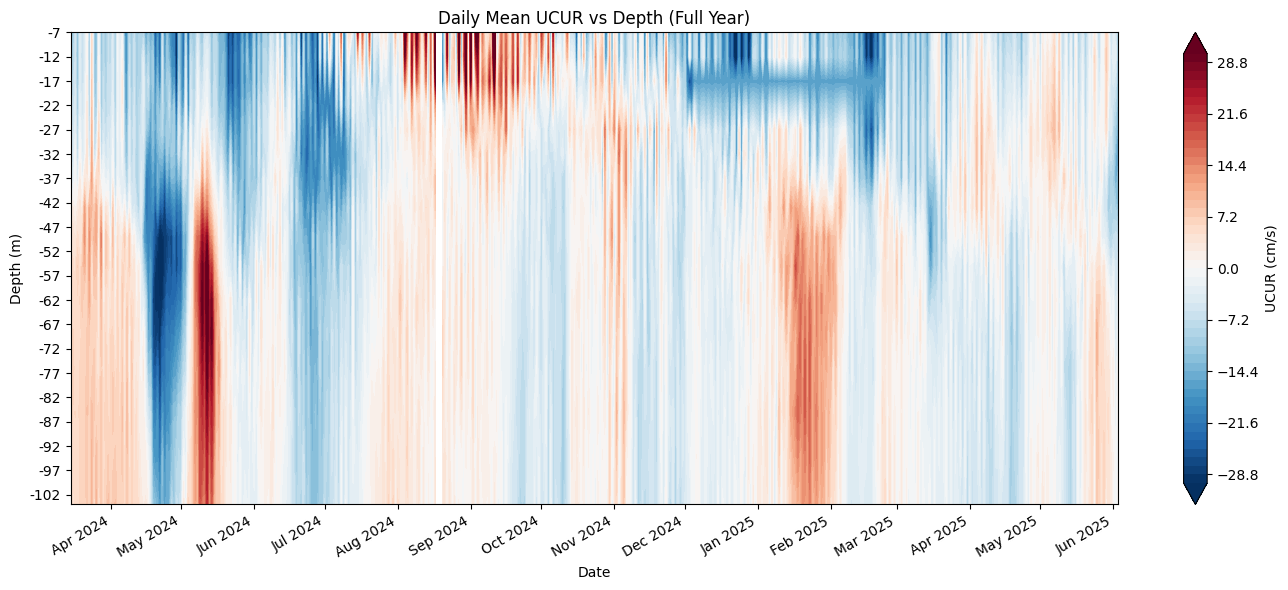

In [56]:

import numpy as np
import matplotlib.dates as mdates

# --- Fill NaNs in daily_mean_u ---
# Convert dates to numeric time
t_numeric = mdates.date2num(daily_dates)  
z = zc                                     # i don't know why i didn't just do this at the start 

# Transpose for fillnan function 
vel_input = daily_mean_u.T

# Fill NaNs using fillnan 
daily_mean_u_filled = fillnan_tacos_38W(t_numeric, z, vel_input, tempgap=10)

# Transpose back for plotting (nz, nt)
daily_mean_u_filled = daily_mean_u_filled.T


DATES, DEPTHS = np.meshgrid(mdates.date2num(daily_dates), zc)  # zc = depth array

fig, ax1 = plt.subplots(figsize=(14, 6))
cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(-30, 30, 51)       # can be adjusted to change contour levels on graphs !!!

contour = ax1.contourf(DATES, DEPTHS, daily_mean_u_filled, levels=levels, cmap=cmap, extend='both')

ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Date')
ax1.set_title('Daily Mean UCUR vs Depth (Full Year)')

# Set y-axis limits and ticks for depth
ax1.set_ylim(7, 104) 
ax1.set_yticks(np.arange(7, 105, 5))
ax1.set_yticklabels([f"-{int(tick)}" for tick in np.arange(7, 105, 5)])
ax1.invert_yaxis()

# Monthly ticks
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator())        # Tick every month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Mar 2024"
fig.autofmt_xdate()  # Auto-rotate labels for better fit

cbar = fig.colorbar(contour, ax=ax1)
cbar.set_label('UCUR (cm/s)')

plt.tight_layout()
plt.show()


Skipping interpolation at time index 156: not enough valid points
Skipping interpolation at time index 157: not enough valid points


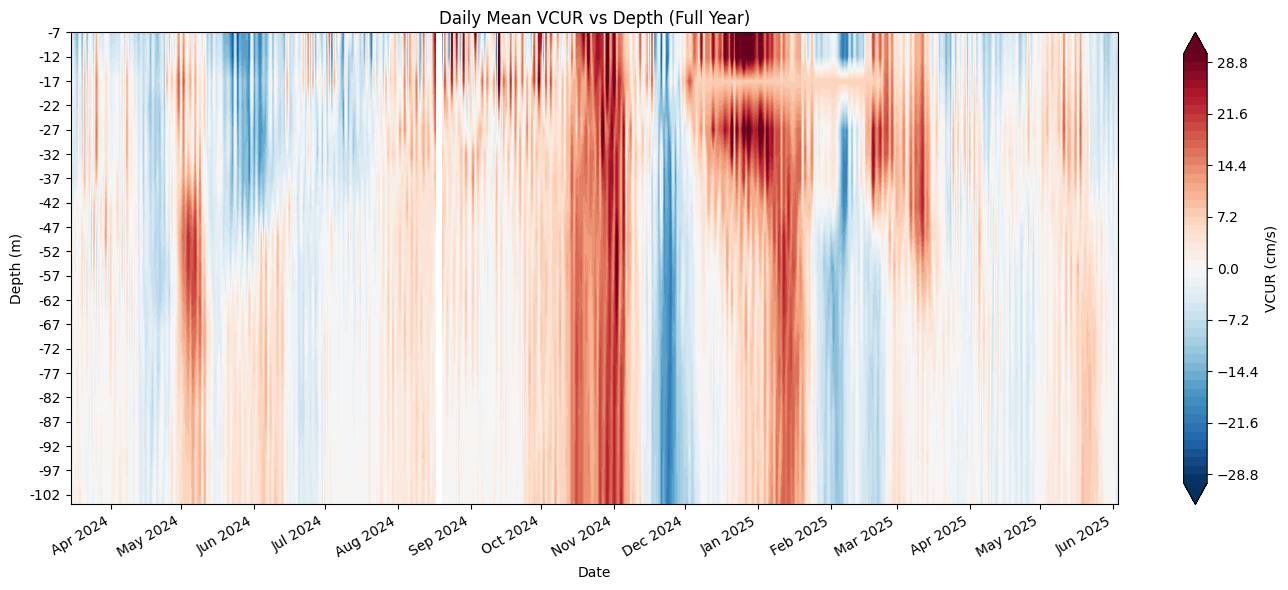

In [57]:
# Plot VCUR daily averages 

import numpy as np
import matplotlib.dates as mdates

# Convert dates to numeric time
t_numeric = mdates.date2num(daily_dates)  
z = zc                                     

# Transpose daily_mean_v to use fillnan function 
vel_input = daily_mean_v.T  

# Fill NaNs
daily_mean_v_filled = fillnan_tacos_38W(t_numeric, z, vel_input, tempgap=10)

# Transpose back for plotting (nz, nt)
daily_mean_v_filled = daily_mean_v_filled.T

# Create meshgrid for dates and depths
DATES, DEPTHS = np.meshgrid(mdates.date2num(daily_dates), zc)  # zc = depth array

# Setup figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colormap and contour levels
cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(-30, 30, 51)       # can be adjusted to change contour levels!!!

# Plot filled contour
contour = ax1.contourf(DATES, DEPTHS, daily_mean_v_filled, levels=levels, cmap=cmap, extend='both')

# Axis labels and title
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Date')
ax1.set_title('Daily Mean VCUR vs Depth (Full Year)')

# Set y-axis limits and ticks for depth, invert y-axis to have shallowest on top
ax1.set_ylim(7, 104)
yticks = np.arange(7, 105, 5)
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"-{int(t)}" for t in yticks])
ax1.invert_yaxis()

# Format x-axis with monthly ticks and date labels
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Monthly ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Mar 2024"
fig.autofmt_xdate()  # Rotate date labels for readability

# Add colorbar with label
cbar = fig.colorbar(contour, ax=ax1)
cbar.set_label('VCUR (cm/s)')

# Adjust layout and display
plt.tight_layout()
plt.show()




### Shear 

#### Calculating Shear 

##### Low Pass Filter Subfuntion 

In [66]:
# low pass filter sub function

def lowpass_bartlett(data, window_len):
    """Apply low-pass filtering using a Bartlett window of given length."""
    if window_len < 3: # make sure the length for the window is large enough 
        return data

    window = np.bartlett(window_len) # establish a triangular window of the given size 
    window /= window.sum()           # normalize the window so that each weight sums to 1

    # Handle 2D arrays (time x depth or time x level)
    if data.ndim == 2:                                      # if data passed in has two dimensions
        filtered = np.empty_like(data)                      # an empty array of the same shape is made 
        for i in range(data.shape[1]):                      # looping through each depth level 
            series = data[:, i]                             # series represents the time series for each depth
            mask = np.isnan(series)                         # finding NaN values inside series  
            if np.all(mask) or np.all(~mask):               # if the entire series is missing, an entire NaN column is returned 
                filtered[:, i] = series if np.all(~mask) else np.nan            # all data is valid just gets copied, otherwise NaN fills whole column 
            else:
                filled = np.copy(series)                    # make copy to interpolate    
                valid_idx = np.flatnonzero(~mask)           # valid_idx holds indices of valid data points (~ just inverts the boolean values in mask)
                missing_idx = np.flatnonzero(mask)          # missing_idx holds indices of NaN values 
                
                if mask.any():
                    filled[mask] = np.interp(missing_idx, valid_idx, series[valid_idx])
                

                conv = np.convolve(filled, window, mode='same')
                conv[mask] = np.nan
                filtered[:, i] = conv 
                
        return filtered

    # Handle 1D arrays          # same logic as above applies here instead it is for a 1D array 
    elif data.ndim == 1:
        mask = np.isnan(data)
        if np.all(mask):
            return data
        filled = np.copy(data)
        filled[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), data[~mask])
        conv = np.convolve(filled, window, mode='same')
        conv[mask] = np.nan  # put NaNs back
        return conv

    else:
        raise ValueError("Data must be 1D or 2D")


In [67]:
import numpy as np
from datetime import datetime, timedelta

# Time Conversion Subfunctions 

def julian(date_array):
    """Convert [year, month, day, hour, minute, second] to Julian day number."""
    dt = datetime(*date_array[:3], date_array[3], date_array[4], date_array[5])
    # Julian day for the date, including fractional day from time
    a = (14 - dt.month)//12
    y = dt.year + 4800 - a
    m = dt.month + 12*a - 3
    JDN = dt.day + ((153*m + 2)//5) + 365*y + y//4 - y//100 + y//400 - 32045
    frac_day = (dt.hour + dt.minute/60 + dt.second/3600)/24
    return JDN + frac_day

def gregorian(jd_array):
    """Convert Julian day number(s) back to [year, month, day, hour, minute, second]."""
    # Vectorized for array input
    out = []
    for jd in jd_array:
        jd = float(jd)
        j = int(jd + 0.5)
        f = jd + 0.5 - j
        if j >= 2299161:
            alpha = int((j - 1867216.25)/36524.25)
            a = j + 1 + alpha - alpha//4
        else:
            a = j
        b = a + 1524
        c = int((b - 122.1)/365.25)
        d = int(365.25 * c)
        e = int((b - d)/30.6001)
        day = b - d - int(30.6001*e) + f
        if e < 14:
            month = e - 1
        else:
            month = e - 13
        if month > 2:
            year = c - 4716
        else:
            year = c - 4715
        # Extract time from fractional day
        day_int = int(day)
        frac = day - day_int
        hour = int(frac * 24)
        minute = int((frac * 24 - hour)*60)
        second = int((((frac * 24 - hour)*60) - minute)*60)
        out.append([year, month, day_int, hour, minute, second])
    return np.array(out)


In [60]:


# Calculate Shear 

# Convert timec days to Julian date since 1950-01-01 00:00:00
base_julian = julian([1950, 1, 1, 0, 0, 0])
time2 = base_julian + timec  # time in Julian 

day1 = julian([2024, 1, 1, 0, 0, 0])  # Julian date for 2024-01-01

# Convert Julian dates to Gregorian calendar dates (year, month, day, ...)
timevec = gregorian(time2)  # convert back to gregorian 
month = timevec[:, 1]       # extracts month for each time series 

# time2 relative to 2024-01-01, +1 to match MATLAB
time2_rel = time2 - day1 + 1

# Prepare variables like Renellys' script in MATLAB
UU_tflex = u.copy()
VV_tflex = v.copy()
flagval = ~np.isnan(UU_tflex)  # Not NaN mask
x = time2_rel
y = -zc  # depths negative for plotting

UU_tflex_orig = UU_tflex.copy()
VV_tflex_orig = VV_tflex.copy()

# Fill NaNs using fillnan_tacos_38W function 
UU_tflex = fillnan_tacos_38W(x, zc, UU_tflex, 48)
VV_tflex = fillnan_tacos_38W(x, zc, VV_tflex, 48)

# Calculate vertical shear dudz and dvdz (1/s units)
dudz = np.empty((len(x), len(zc) - 1))                  # creates empty arrays to hold all shears 
dvdz = np.empty_like(dudz)
zc_shear = np.empty(len(zc) - 1)

# Find Shear          
for iz in range(len(zc) - 1):                                                                   # loop through depth layers 
    dz = abs(zc[iz] - zc[iz+1])                                                                 # dz is change in depth 
    dudz[:, iz] = (UU_tflex[:, iz] - UU_tflex[:, iz+1]) / dz / 100                              # solve for shear in m/s^2
    dvdz[:, iz] = (VV_tflex[:, iz] - VV_tflex[:, iz+1]) / dz / 100
    zc_shear[iz] = np.mean(zc[iz:iz+2])

shearsquare = dudz**2 + dvdz**2                         # calculate shear squared 
maxshearsquare = np.nanmax(shearsquare, axis=1)         # max shear squared 


# Calculate depth of max shear for each time index 
zc_maxshearsquare = np.empty(len(x))                                                            # create empty array to hold data                                              
for it in range(len(x)):                                                                        # loop through time 
    if not np.isnan(maxshearsquare[it]):                                                        # loop as long as max shear isn't NaN
        indices = np.where(shearsquare[it, :] == maxshearsquare[it])[0]                         # Keep track of indices where max shear occurs 
        zc_maxshearsquare[it] = np.mean(zc_shear[indices])                                      # Average depths of max shears 
    else:
        zc_maxshearsquare[it] = np.nan

# Apply 24-hour low-pass filter with Bartlett window length 12
window_len = 12
VV_tflex = lowpass_bartlett(VV_tflex, window_len)
UU_tflex = lowpass_bartlett(UU_tflex, window_len)
dudz = lowpass_bartlett(dudz, window_len)
dvdz = lowpass_bartlett(dvdz, window_len)
shearsquare = lowpass_bartlett(shearsquare, window_len)
zc_maxshearsquare = lowpass_bartlett(zc_maxshearsquare[:, None], window_len).flatten()

# Final matrix for plotting or analysis
panel1 = UU_tflex.T  # transpose to match MATLAB's column major


# Define the day range
start_day = 300
end_day = 350

# Find time indices for the day range
time_mask = (time2_rel >= start_day) & (time2_rel <= end_day)
selected_times = time2_rel[time_mask]
selected_UU = UU_tflex[time_mask, :]
selected_VV = VV_tflex[time_mask, :]




Interpolation failed at time index 2083: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 2084: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3712: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3713: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3714: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3715: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3716: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3717: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3718: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3719: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3720: cannot re

C:\Users\mia.case\AppData\Local\Temp\ipykernel_5768\3333706508.py:43: RuntimeWarning: All-NaN slice encountered
  maxshearsquare = np.nanmax(shearsquare, axis=1)         # max shear squared


In [61]:
# Print mean at each depth 

import numpy as np
import pandas as pd

# Example: u.shape == v.shape == tc.shape == (len(timec), len(zc))

# Compute mean across time (axis 0), so result shape is (16,)
u_mean = np.nanmean(u, axis=0)
v_mean = np.nanmean(v, axis=0)
tc_mean = np.nanmean(tc, axis=0)

# Create a DataFrame to display results nicely
df_avg = pd.DataFrame({
    "Depth (m)": zc,
    "U mean (m/s)": u_mean,
    "V mean (m/s)": v_mean,
    "T mean (°C)": tc_mean
})

print("\nAverage Values Across Entire Time Series:\n")
print(df_avg.to_string(index=False))




Average Values Across Entire Time Series:

 Depth (m)  U mean (m/s)  V mean (m/s)  T mean (°C)
       7.0     -7.613677     -0.464530    26.482288
      12.0     -6.940742     -0.252252    26.371069
      17.0     -8.077816      2.051809    26.242771
      22.0     -6.254545     -2.335286    25.169613
      27.0     -4.556494      2.300101    24.068905
      32.0     -4.458163      2.202671    23.083725
      37.0     -4.034137      1.818534    22.046547
      43.0     -2.856685      1.578586    20.570478
      49.0     -2.354656      1.576978    19.101807
      55.0     -1.964564      1.248360    17.835827
      62.0     -1.387675      1.201689    16.813740
      69.0     -1.299447      1.478425    16.043402
      76.0     -1.127324      1.197502    15.578147
      85.0     -0.665409      0.879958    15.073139
      94.0     -0.673878      1.109477    14.686987
     104.0     -0.771911      1.103649    14.353294


In [62]:
# Loop through each timestamp and print table of ucur/vcur by depth
for i, t in enumerate(selected_times):
    day_int, day_frac = divmod(t, 1)
    hour = int(day_frac * 24)
    label = f"Day {int(day_int)}, Hour {hour:02d}"
    
    print(f"\n{label} (Relative to 2024-01-01):\n")
    df = pd.DataFrame({
        "Depth (m)": zc,
        "U current (m/s)": selected_UU[i, :],
        "V current (m/s)": selected_VV[i, :]
    })
    print(df.to_string(index=False))

    max_val = np.max(selected_UU)
    max_index= np.argmax(selected_UU)
    print("Max value:", max_val)
    print("At index:", max_index)


Day 300, Hour 00 (Relative to 2024-01-01):

 Depth (m)  U current (m/s)  V current (m/s)
       7.0        -4.518200        45.782158
      12.0        -1.560943        48.710403
      17.0         9.176961        19.684597
      22.0         8.897779        19.232317
      27.0         8.618599        18.780037
      32.0        15.697351        29.191149
      37.0         8.569084        19.075922
      43.0         1.539047         9.585475
      49.0        -0.978581        13.118399
      55.0        -4.313047         8.808951
      62.0        -9.060523         3.249143
      69.0        -8.535171         4.350961
      76.0        -5.577914         7.279209
      85.0        -5.366952        11.471522
      94.0        -2.652866         9.188161
     104.0        -2.423000         9.632190
Max value: 40.09151
At index: 10052

Day 300, Hour 00 (Relative to 2024-01-01):

 Depth (m)  U current (m/s)  V current (m/s)
       7.0        -8.731523        27.942093
      12.0        -

#### Plotting Shear

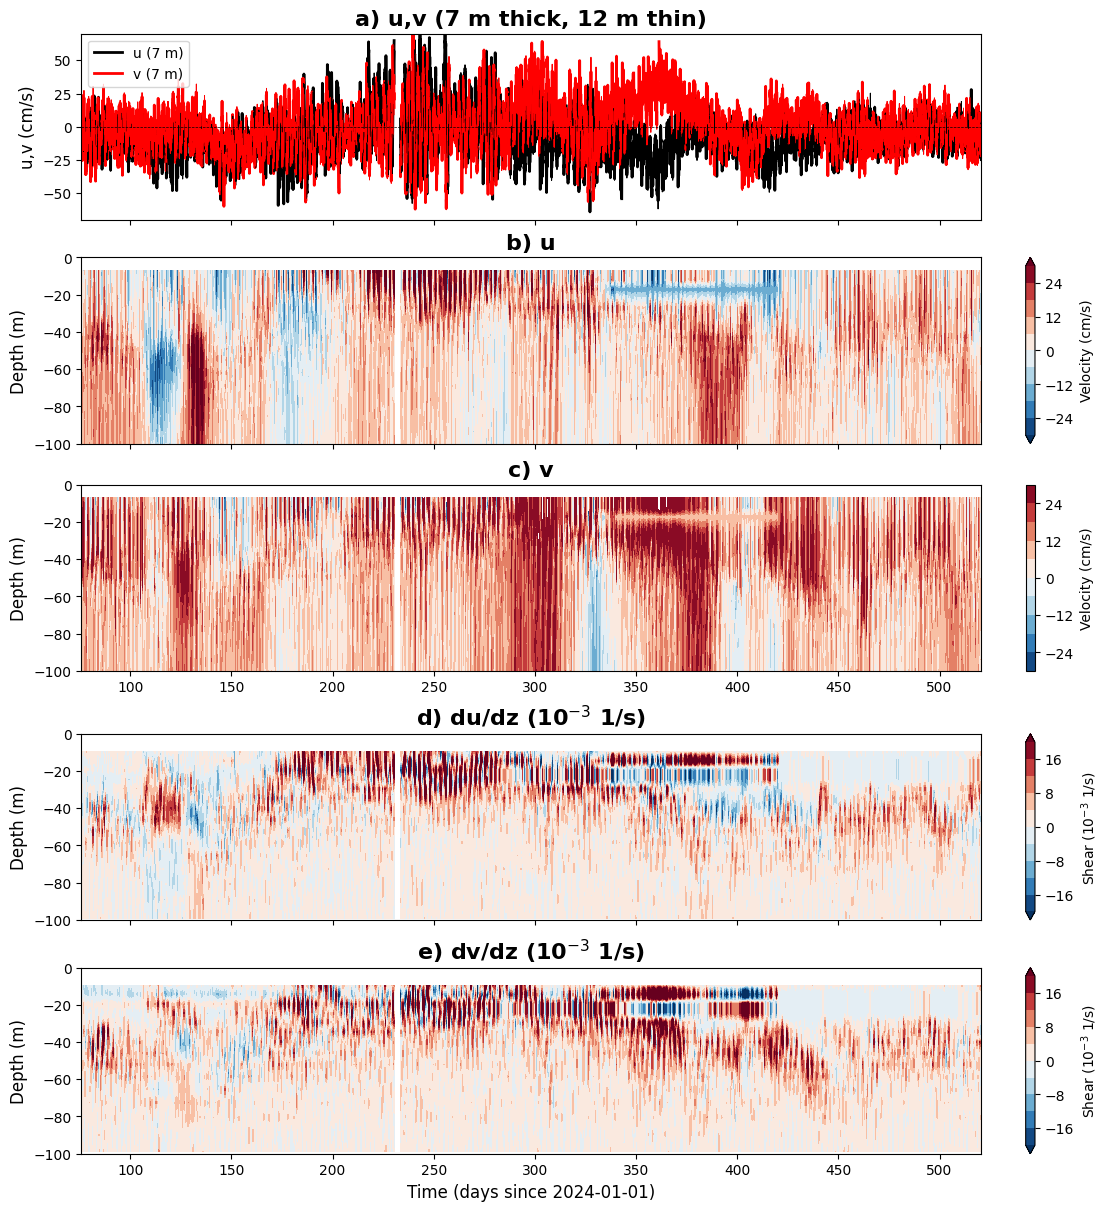

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib


# ========== PLOTTING ==========

fig, axs = plt.subplots(5, 1, figsize=(11, 12), gridspec_kw={'height_ratios':[1,1,1,1,1]}, constrained_layout=True)

# Convert time x to matplotlib dates if datetime64
if np.issubdtype(x.dtype, np.datetime64):
    x_plot = mdates.date2num(x)
else:
    x_plot = x

xrange = [np.nanmin(x), np.nanmax(x)]
yrange = [-100, 0]

# Panel 0: u,v at shallow depths
axs[0].plot(x_plot, UU_tflex[:, 0], 'k-', linewidth=2, label='u (7 m)')
axs[0].plot(x_plot, VV_tflex[:, 0], 'r-', linewidth=2, label='v (7 m)')
axs[0].plot(x_plot, UU_tflex[:, 1], 'k-', linewidth=.7)
axs[0].plot(x_plot, VV_tflex[:, 1], 'r-', linewidth=.7)
axs[0].axhline(0, color='k', linestyle='--', linewidth=.5)
axs[0].set_xlim(xrange)
axs[0].set_ylim(-70, 70)
axs[0].set_ylabel('u,v (cm/s)', fontsize=12)
axs[0].legend(loc='upper left')
axs[0].set_title('a) u,v (7 m thick, 12 m thin)', fontsize=16, fontweight='bold')
axs[0].tick_params(axis='x', labelbottom=False)

# Define contour levels and colormap
caxis1 = [-30, 30]
cint1 = np.linspace(-30, 30, 11)
cmap_brown_blue = matplotlib.colormaps['RdBu_r']  # blue-white-red colormap

# Panel 1: u contour


cs1 = axs[1].contourf(x_plot, y, UU_tflex.T, levels=cint1, cmap=cmap_brown_blue, extend='both')
#axs[1].contour(x_plot, y, UU_tflex.T, levels=cint1, colors='k', linewidths=.01)
axs[1].set_xlim(xrange)
axs[1].set_ylim(yrange)
axs[1].set_ylabel('Depth (m)', fontsize=12)
axs[1].set_title('b) u', fontsize=16, fontweight='bold')
axs[1].tick_params(axis='x', labelbottom=False)
axs[1].set_yticks(np.arange(-100, 1, 20))
axs[1].tick_params(axis='y', direction='out')

# Panel 2: v contour
cs2 = axs[2].contourf(x_plot, y, VV_tflex.T, levels=cint1, cmap=cmap_brown_blue, vmin=-30, vmax=30)
#axs[2].contour(x_plot, y, VV_tflex.T, levels=cint1, colors='k', linewidths=.01)
axs[2].set_xlim(xrange)
axs[2].set_ylim(yrange)
axs[2].set_ylabel('Depth (m)', fontsize=12)
axs[2].set_title('c) v', fontsize=16, fontweight='bold')
axs[2].set_yticks(np.arange(-100, 1, 20))
axs[2].tick_params(axis='y', direction='out')

# Panel 3: du/dz contour (multiplied by 1e3)
caxis2 = [-20, 20]
cint2 = np.linspace(-20, 20, 11)
cs3 = axs[3].contourf(x_plot, -zc_shear, dudz.T*1e3, levels=cint2, cmap=cmap_brown_blue, extend='both')

#axs[3].contour(x_plot, -zc_shear, dudz.T*1e3, levels=cint2, colors='k', linewidths=.01)
axs[3].set_xlim(xrange)
axs[3].set_ylim(yrange)
axs[3].set_ylabel('Depth (m)', fontsize=12)
axs[3].set_title('d) du/dz (10$^{-3}$ 1/s)', fontsize=16, fontweight='bold')
axs[3].tick_params(axis='x', labelbottom=False)
axs[3].set_yticks(np.arange(-100, 1, 20))
axs[3].tick_params(axis='y', direction='out')

# Panel 4: dv/dz contour (multiplied by 1e3)
cs4 = axs[4].contourf(x_plot, -zc_shear, dvdz.T*1e3, levels=cint2, cmap=cmap_brown_blue, extend='both')
#axs[4].contour(x_plot, -zc_shear, dvdz.T*1e3, levels=cint2, colors='k', linewidths=.01)
axs[4].set_xlim(xrange)
axs[4].set_ylim(yrange)
axs[4].set_ylabel('Depth (m)', fontsize=12)
axs[4].set_title('e) dv/dz (10$^{-3}$ 1/s)', fontsize=16, fontweight='bold')
axs[4].set_xlabel('Time (days since 2024-01-01)', fontsize=12)
axs[4].set_yticks(np.arange(-100, 1, 20))
axs[4].tick_params(axis='y', direction='out')

# Colorbars for velocity and shear panels
fig.colorbar(cs1, ax=axs[1], orientation='vertical', label='Velocity (cm/s)')
fig.colorbar(cs2, ax=axs[2], orientation='vertical', label='Velocity (cm/s)')
fig.colorbar(cs3, ax=axs[3], orientation='vertical', label='Shear (10$^{-3}$ 1/s)')
fig.colorbar(cs4, ax=axs[4], orientation='vertical', label='Shear (10$^{-3}$ 1/s)')

plt.show()




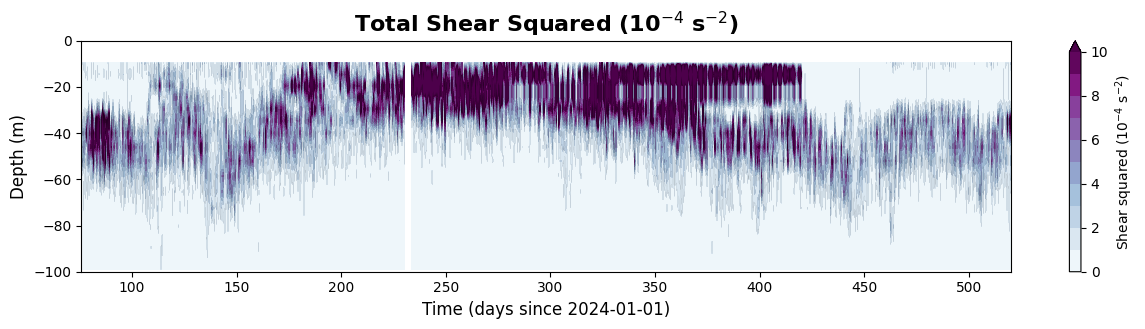

In [64]:
# Plotting Total Shear

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

# Convert time x to matplotlib date numbers if datetime64
if np.issubdtype(x.dtype, np.datetime64):
    x_plot = mdates.date2num(x)
else:
    x_plot = x

xrange = [np.nanmin(x), np.nanmax(x)]
yrange = [-100, 0]  # depth range for y axis

# Define contour levels for total shear squared in units of 10^-4 s^-2 using 95th percentile to avoid outliers
max_val = np.nanpercentile(shearsquare * 1e4, 95)
cint_shear_sq = np.linspace(0, 10, 11)

cmap_brown_blue = matplotlib.colormaps['BuPu']

# Create the figure and axis with longer, skinnier size
fig, ax = plt.subplots(figsize=(15, 3))

# Plot total shear squared (scaled by 1e4 for 10^-4 units)
cs = ax.contourf(x_plot, -zc_shear, shearsquare.T * 1e4, levels=cint_shear_sq, cmap=cmap_brown_blue, extend='max')
ax.contour(x_plot, -zc_shear, shearsquare.T * 1e4, levels=cint_shear_sq, colors='k', linewidths=0.03)

# Set axis limits and labels
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Time (days since 2024-01-01)', fontsize=12)
ax.set_title('Total Shear Squared (10$^{-4}$ s$^{-2}$)', fontsize=16, fontweight='bold')
ax.set_yticks(np.arange(-100, 1, 20))
ax.tick_params(axis='y', direction='out')

# Add colorbar
fig.colorbar(cs, ax=ax, orientation='vertical', label='Shear squared (10$^{-4}$ s$^{-2}$)')

plt.show()


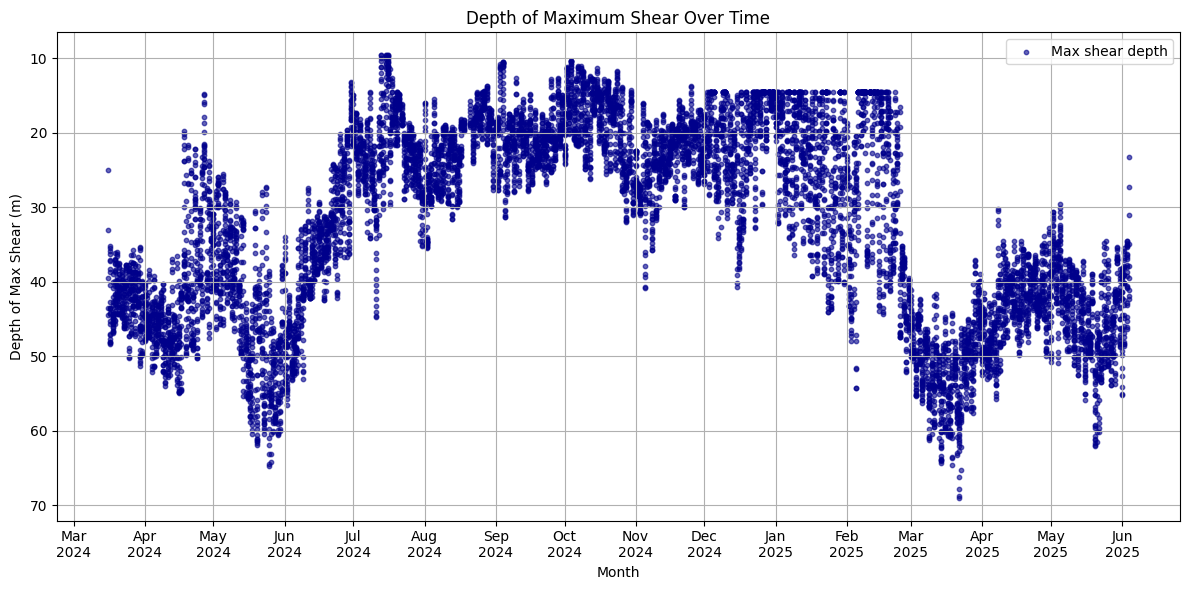

In [65]:
# Plotting zc_maxshear 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Ensure time is in datetime format
if not np.issubdtype(x.dtype, np.datetime64):
    base_date = np.datetime64('2024-01-01')
    x_dates = base_date + x.astype('timedelta64[D]')
else:
    x_dates = x

# Convert to pandas datetime index
time_index = pd.to_datetime(x_dates)

# Convert to DataFrame for easy monthly grouping
df_depths = pd.DataFrame({
    'time': time_index,
    'depth': zc_maxshearsquare
}).dropna()

# Group by month and collect depths
df_depths['month'] = df_depths['time'].dt.to_period('M')

# Set up the figure
plt.figure(figsize=(12, 6))

plt.scatter(df_depths['time'], df_depths['depth'], s=10, alpha=0.6, c='darkblue', label='Max shear depth')

# Invert y-axis (depth increases downward)
plt.gca().invert_yaxis()

# Formatting x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

plt.xlabel('Month')
plt.ylabel('Depth of Max Shear (m)')
plt.title('Depth of Maximum Shear Over Time')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


## Standard Deviations 

### Calculating Standard Deviations 

In [68]:
# Calculate Standard Deviations 

import numpy as np
import pandas as pd

# Convert time to pandas datetime for easier grouping 
if not np.issubdtype(x.dtype, np.datetime64):
    # If x is numeric days since 2024-01-01, convert:
    base_date = np.datetime64('2024-01-01')
    x_dates = base_date + x.astype('timedelta64[D]')
else:
    x_dates = x

# Extract just the date (drop time info) for grouping by day
x_days = pd.to_datetime(x_dates).normalize()

# Unique days in data
unique_days = np.unique(x_days)

n_depths = u.shape[1]           # create arrays to hold data 
n_days = len(unique_days)

# Initialize arrays to hold daily std dev at each depth
std_u_daily = np.full((n_days, n_depths), np.nan)
std_v_daily = np.full((n_days, n_depths), np.nan)

for i, day in enumerate(unique_days):                       # loop over each day 
    # Find indices for current day
    indices = np.where(x_days == day)[0]                    # keeps track of indices of values at this day 
    
    # Calculate std dev over raw data for this day, at each depth
    std_u_daily[i, :] = np.nanstd(u[indices, :], axis=0)
    std_v_daily[i, :] = np.nanstd(v[indices, :], axis=0)

# apply fillnan and low pass filter 
std_u_filled = fillnan_tacos_38W(unique_days, zc, std_u_daily, 48)
std_v_filled = fillnan_tacos_38W(unique_days, zc, std_v_daily, 48)

window_len = 5  # adjustable smoothing window length
std_u_smooth = lowpass_bartlett(std_u_filled, 24)
std_v_smooth = lowpass_bartlett(std_v_filled, 24)




c:\Users\mia.case\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [69]:
# Calculate monthly standard deviations 

import pandas as pd
import numpy as np

# use u and v and put through fillnan 
daily_u_filled = fillnan_tacos_38W(t=None, z=z, vel=u, tempgap=None)
daily_v_filled = fillnan_tacos_38W(t=None, z=z, vel=v, tempgap=None)

# apply low pass filter 
window_len = 12
daily_u_smooth = lowpass_bartlett(daily_u_filled, window_len)
daily_v_smooth = lowpass_bartlett(daily_v_filled, window_len)

x_dates = pd.to_datetime(x_dates)  # dates to datetime 

# Create DataFrame for easy grouping
df_u = pd.DataFrame(daily_u_smooth, index=x_dates)
df_v = pd.DataFrame(daily_v_smooth, index=x_dates)

# Group by month and calculate std dev along time (axis=0)
std_u_monthly = df_u.groupby(df_u.index.to_period('M')).std().values  # shape (n_months, n_depths)
std_v_monthly = df_v.groupby(df_v.index.to_period('M')).std().values




Interpolation failed at time index 2083: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 2084: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3712: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3713: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3714: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3715: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3716: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3717: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3718: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3719: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3720: cannot re

### Plotting Standard Deivations

C:\Users\mia.case\AppData\Local\Temp\ipykernel_5768\2816524604.py:18: UserWarning: linewidths is ignored by contourf
  cs1 = axs[0].contourf(DATES, -DEPTHS, std_u_smooth.T, levels=levels, cmap=cmap, extend='max', linewidths=.1)


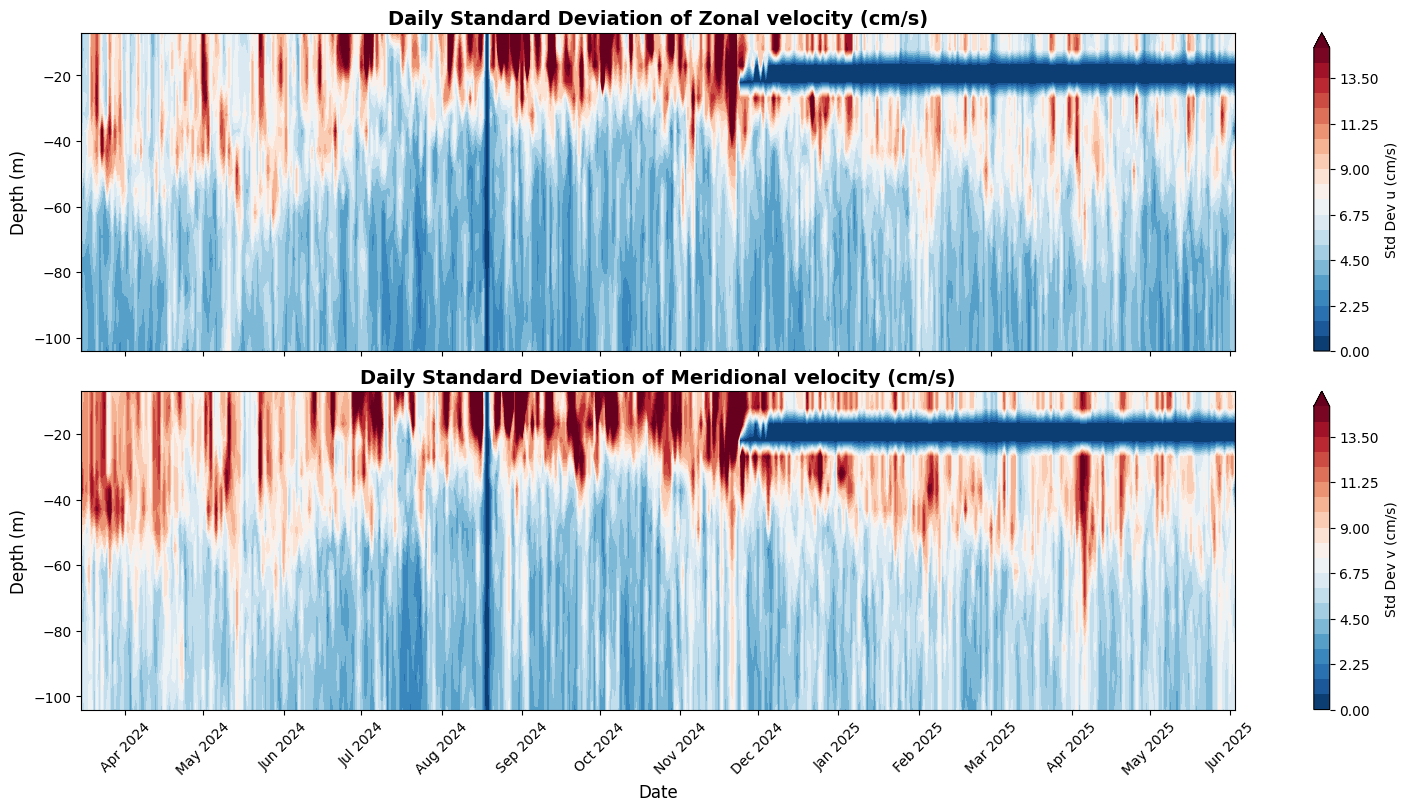

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

# Create meshgrid for plotting
DATES, DEPTHS = np.meshgrid(mdates.date2num(daily_dates), zc)

# Colormap and contour levels
cmap = plt.get_cmap('RdBu_r')
max_std = np.nanmax([std_u_smooth, std_v_smooth])
levels = np.linspace(0, 15, 21)

# Create figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 8), constrained_layout=True)

# Panel 1: Standard deviation of u
cs1 = axs[0].contourf(DATES, -DEPTHS, std_u_smooth.T, levels=levels, cmap=cmap, extend='max', linewidths=.1)
axs[0].set_ylabel('Depth (m)', fontsize=12)
axs[0].set_title('Daily Standard Deviation of Zonal velocity (cm/s)', fontsize=14, fontweight='bold')
axs[0].xaxis_date()
axs[0].set_ylim(-np.nanmax(zc), -np.nanmin(zc))
axs[0].tick_params(axis='x', labelbottom=False)
fig.colorbar(cs1, ax=axs[0], orientation='vertical', label='Std Dev u (cm/s)')

# Panel 2: Standard deviation of v
cs2 = axs[1].contourf(DATES, -DEPTHS, std_v_smooth.T, levels=levels, cmap=cmap, extend='max')
axs[1].set_ylabel('Depth (m)', fontsize=12)
axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_title('Daily Standard Deviation of Meridional velocity (cm/s)', fontsize=14, fontweight='bold')
axs[1].set_ylim(-np.nanmax(zc), -np.nanmin(zc))
fig.colorbar(cs2, ax=axs[1], orientation='vertical', label='Std Dev v (cm/s)')

# Format x-axis to show months and years
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.show()



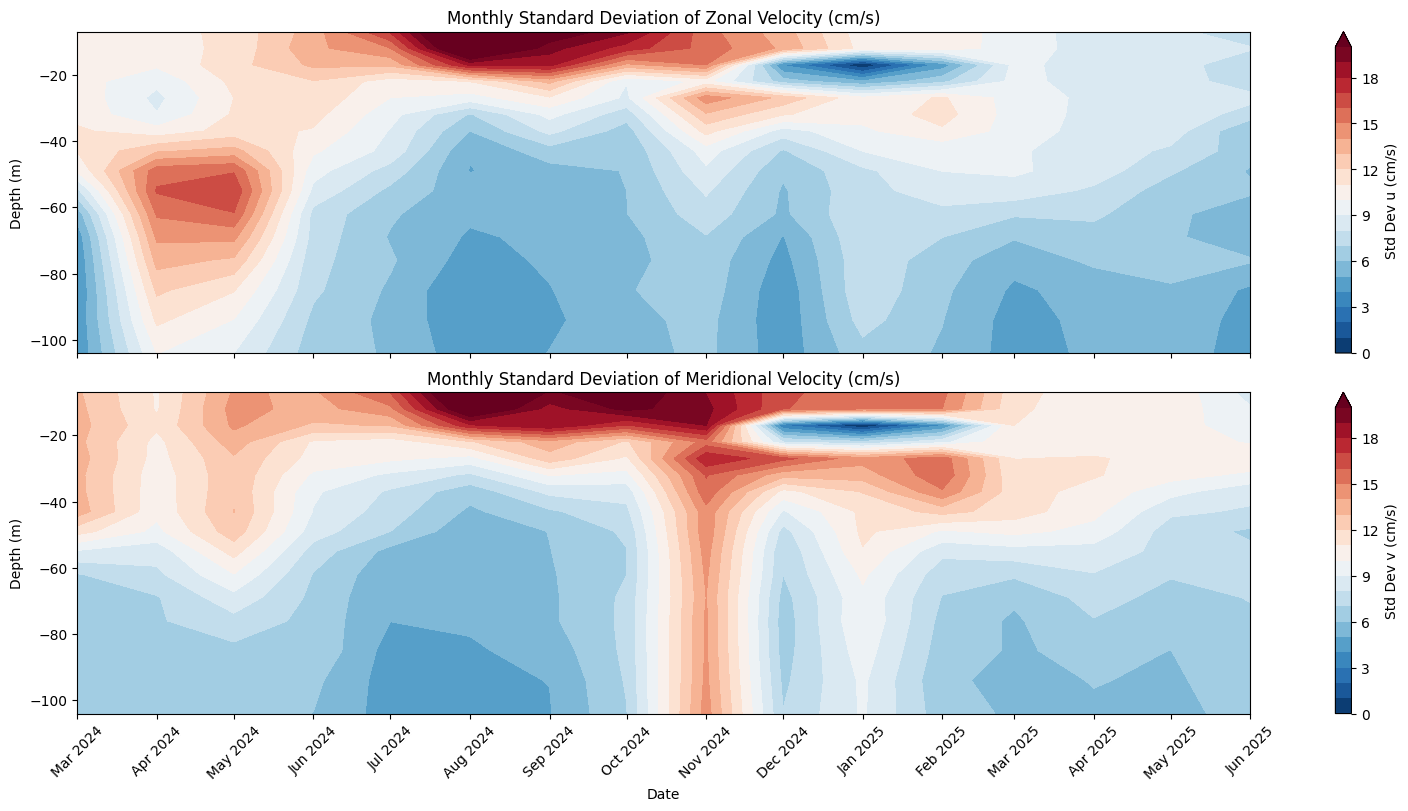

In [71]:
# Plotting Monthly Standard Deviations 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

monthly_index = df_u.index.to_period('M').drop_duplicates().to_timestamp()

# x axis = time (15 months)
time_num = mdates.date2num(monthly_index)  # shape (15,)
# y axis = depth (16)
depths = zc  # shape (16,)

# meshgrid with indexing='ij' to keep shape (time, depth)
# or default meshgrid with transpose to get shape (depth, time)

X, Y = np.meshgrid(time_num, depths)  # X,Y shapes: (16, 15)

# Your std_u_monthly shape is (15, 16), so transpose to (16, 15)
Z_u = std_u_monthly.T

# Plot
fig, axs = plt.subplots(2, 1, figsize=(14, 8), constrained_layout=True)

cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(0, 20, 21)

X_fixed = X[:, :16]
Y_fixed = Y[:, :16]

cs1 = axs[0].contourf(X_fixed, -Y_fixed, Z_u, levels=levels, cmap=cmap, extend='max')

axs[0].set_ylabel('Depth (m)')
axs[0].set_title('Monthly Standard Deviation of Zonal Velocity (cm/s)')
axs[0].xaxis_date()
axs[0].set_ylim(-np.nanmax(depths), -np.nanmin(depths))
axs[0].tick_params(axis='x', labelbottom=False)
fig.colorbar(cs1, ax=axs[0], label='Std Dev u (cm/s)')

# Panel 2
Z_v = std_v_monthly.T
cs2 = axs[1].contourf(X_fixed, -Y_fixed, Z_v, levels=levels, cmap=cmap, extend='max')
axs[1].set_ylabel('Depth (m)')
axs[1].set_xlabel('Date')
axs[1].set_title('Monthly Standard Deviation of Meridional Velocity (cm/s)')
axs[1].set_ylim(-np.nanmax(depths), -np.nanmin(depths))
fig.colorbar(cs2, ax=axs[1], label='Std Dev v (cm/s)')

# Format x-axis date
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.show()



# Stratification 

## Calculating Density 

In [75]:
# Calculating density 

# one standard atmophere equation of state from UNESCO 1980

# create variables:
d_0 = 0             # density at one atmosphere
d_w = 0             # density of standard mean ocean water
T = tc              # temp from dataset
S = 35              # approximate salinity g/kg
density = 0         # density (S, t, p) from high pressure EOS
K = 0               # secant bulk modulus 
K_w = 0             # secant bulk modulus 
K_0 = 0             # secan bulk modulus 
A = 0               # term in K 
A_w = 0             # term in K
B = 0               # term in K
B_w = 0             # term in K 
p = nc.variables['PRES'][:]     # pressure read in from data set dbars

# set up equations 
T2 = T**2
T3 = T**3
T4 = T**4
T5 = T**5

d_w = (999.842594 + (6.793952e-2 * T) - (9.095290e-3 * T2) + 
        (1.001685e-4 * T3) - (1.120083e-6 * T4) + (6.536332e-9 * T5))

d_0 = (d_w + ((8.24493e-1 - (4.0899e-3 * T) + (7.6438e-5 * T2) - (8.2467e-7 * T3) + 
               (5.3875e-9 * T4)) * S) + (((-5.724e-3) + (1.0227e-4 * T) - 
                (1.6546e-6 * T2)) * S**(3/2)) + (4.8314e-4 * S**2))

K_w = 19652.21 + (148.4206 * T) - (2.327105 * T2) + (1.360477e-2 * T3) - (5.155288e-5 * T4)

A_w = 3.239908 + (1.437e-3 * T) + (1.16092e-4 * T2) - (-5.77905e-7 * T3) 

B_W = (8.50935e-5) - (6.12293e-6 * T) + (5.2787e-8 * T2)

A = A_w + (((2.2838e-3) - (1.0981e-5 * T) - (1.6078e-6 * T2)) * S) + ((1.91075e-4) * S**(3/2))

B = B_w + ((-9.9348e-7) + (2.0816e-8 * T) + (9.1697e-10 * T**2) * S)

K_0 = (K_w + ((54.6746 - (0.603459 * T) + (1.09987e-2 * T2) - (6.1670e-5 * T3) * S))
        + ((7.944e-2) + (1.6483e-2 * T) - (5.3009e-4 * T2) * S**(3/2)))

K = K_0 + (A * p) + (B * p**2)

density = d_0 / (1 - (p / K)) 

Interpolation failed at time index 2083: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 2084: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3712: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3713: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3714: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3715: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3716: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3717: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3718: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3719: cannot reshape array of size 0 into shape (0,newaxis)
Interpolation failed at time index 3720: cannot re

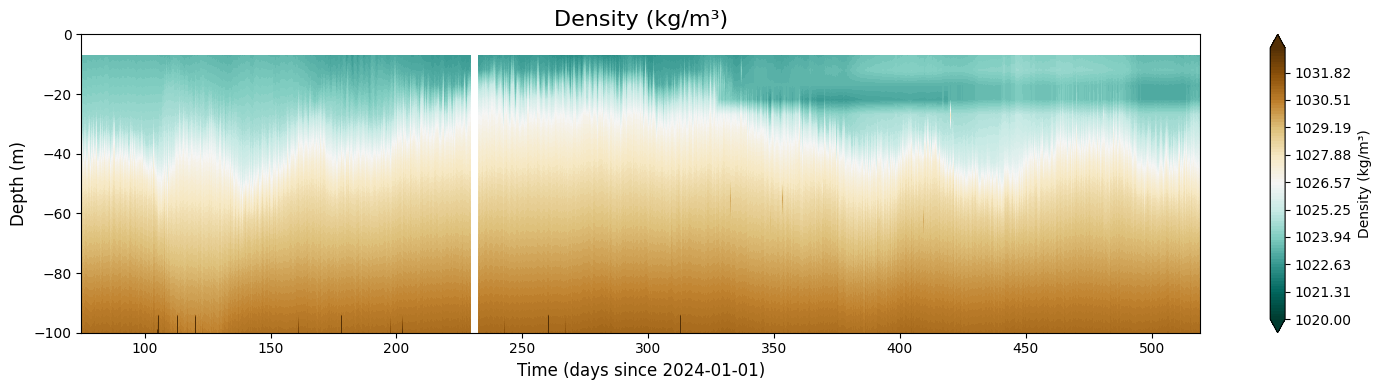

In [73]:
# Plotting density 
from datetime import datetime

# Calculate days from 1950-01-01 to 2024-01-01
days_1950_to_2024 = (datetime(2024, 1, 1) - datetime(1950, 1, 1)).days

# Convert timec to days since 2024-01-01
time_2024 = timec - days_1950_to_2024

x_plot = time_2024  # already in days since 2024-01-01
y_plot = -zc        # Negative for increasing depth down

# smooth and fill density
density_filled = fillnan_tacos_38W(time_2024, zc, density, tempgap=None)
density_smoothed = lowpass_bartlett(density_filled, window_len=12)

# Plotting
fig, ax = plt.subplots(figsize=(15, 4))
cmap = matplotlib.colormaps['BrBG_r']
cint = np.linspace(1020, 1033, 100)
cf = ax.contourf(x_plot, y_plot, density_smoothed.T, levels=cint, cmap=cmap, extend='both')

# Axes and labels
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Time (days since 2024-01-01)', fontsize=12)
ax.set_title('Density (kg/m³)', fontsize=16)
ax.set_ylim(-100, 0)

# Colorbar
cbar = fig.colorbar(cf, ax=ax, orientation='vertical')
cbar.set_label('Density (kg/m³)')


plt.tight_layout()
plt.show()

## Calculating Stratification 

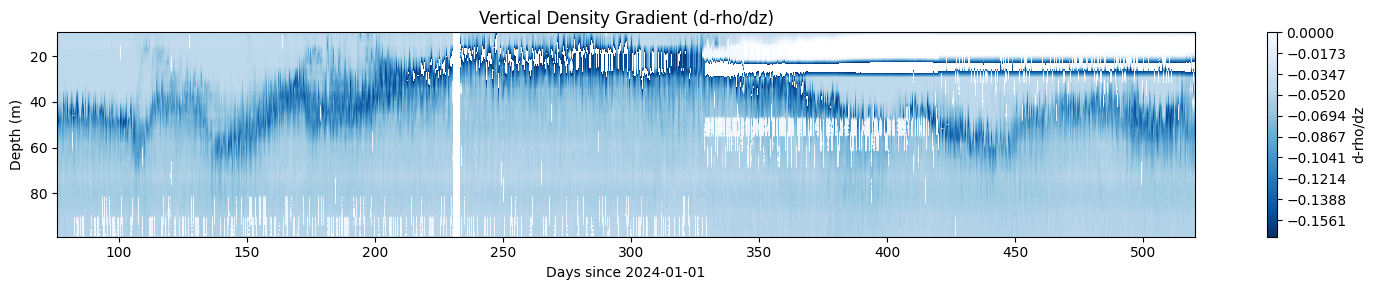

Max dρ/dz: 0.5889689229602937
Min dρ/dz: -3.683259109844471


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Plot density gradient 

# Calculate dT/dz
dddz = np.empty((len(x), len(zc) - 1))
for iz in range(len(zc) - 1):
    dz = abs(zc[iz] - zc[iz + 1])
    dddz[:, iz] = (density_smoothed[:, iz] - density_smoothed[:, iz + 1]) / dz

# Midpoint depths for plotting (between zc levels)
zc_mid = 0.5 * (zc[:-1] + zc[1:])


if np.issubdtype(x.dtype, np.datetime64):
    days_since_start = (x - np.datetime64('2024-01-01')).astype('timedelta64[D]').astype(int)
else:
    days_since_start = x  # assume already in days

# Create meshgrid for contourf
X, Z = np.meshgrid(days_since_start, zc_mid, indexing='ij')

# Plotting
fig, ax = plt.subplots(figsize=(15, 3))
cint = np.linspace(-.17, 0, 50)
c = ax.contourf(X, Z, dddz, cmap='Blues_r', levels=cint)

# Invert Y-axis so depth increases downward
ax.invert_yaxis()

# Axis labels and title
ax.set_xlabel("Days since 2024-01-01")
ax.set_ylabel("Depth (m)")
ax.set_title("Vertical Density Gradient (d-rho/dz)")

# Colorbar on the right
cb = fig.colorbar(c, ax=ax, label="d-rho/dz")

plt.tight_layout()
plt.show()

print("Max dρ/dz:", np.nanmax(dddz))
print("Min dρ/dz:", np.nanmin(dddz))



# Temperature

## Plotting Temperature 

Skipping interpolation at time index 2083: not enough valid points
Skipping interpolation at time index 2084: not enough valid points
Skipping interpolation at time index 3712: not enough valid points
Skipping interpolation at time index 3713: not enough valid points
Skipping interpolation at time index 3714: not enough valid points
Skipping interpolation at time index 3715: not enough valid points
Skipping interpolation at time index 3716: not enough valid points
Skipping interpolation at time index 3717: not enough valid points
Skipping interpolation at time index 3718: not enough valid points
Skipping interpolation at time index 3719: not enough valid points
Skipping interpolation at time index 3720: not enough valid points
Skipping interpolation at time index 3721: not enough valid points
Skipping interpolation at time index 3722: not enough valid points
Skipping interpolation at time index 3723: not enough valid points
Skipping interpolation at time index 3724: not enough valid po

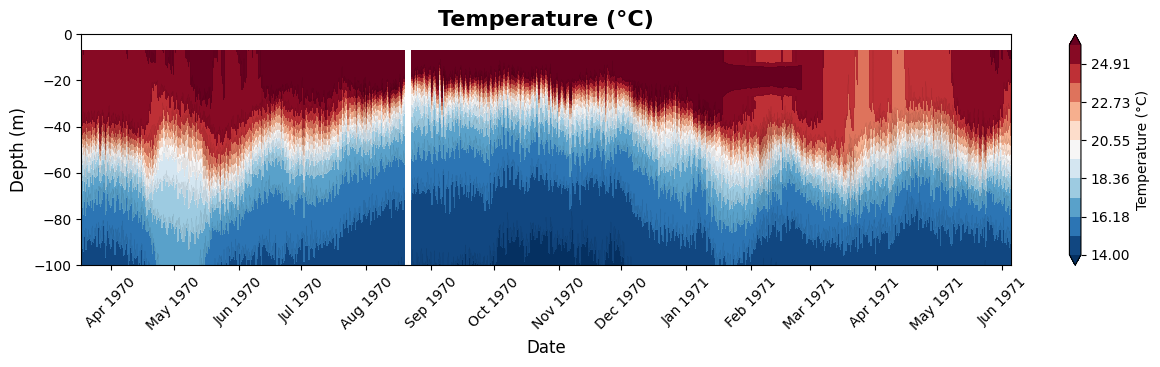

In [78]:
# Plot a temperature vs depth graph

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

# use the fillnan and low pass filter to filter temperature data 
tc_filled = fillnan_tacos_38W(t=None, z=zc, vel=tc, tempgap=None)
tc_smooth = lowpass_bartlett(tc_filled, window_len=12)

# Convert time x to matplotlib date numbers 
if np.issubdtype(x.dtype, np.datetime64):
    x_plot = mdates.date2num(x)
else:
    x_plot = x

xrange = [np.nanmin(x_plot), np.nanmax(x_plot)]
yrange = [-100, 0]  

# Define contour levels for temperature in °C
temp_min = 14
temp_max = 26
cint_temp = np.linspace(temp_min, temp_max, 12)     # can be changed to alter contour levels 

cmap_temp = matplotlib.colormaps['RdBu_r']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 3))

# Plot temperature data 
cs = ax.contourf(x_plot, -zc, tc_smooth.T, levels=cint_temp, cmap=cmap_temp, extend='both')
ax.contour(x_plot, -zc, tc_smooth.T, levels=cint_temp, colors='k', linewidths=0.03)

# Axis formatting
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Temperature (°C)', fontsize=16, fontweight='bold')
ax.set_yticks(np.arange(-100, 1, 20))
ax.tick_params(axis='y', direction='out')

# Format x-axis as monthly ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', rotation=45)

# Colorbar
fig.colorbar(cs, ax=ax, orientation='vertical', label='Temperature (°C)')

plt.show()



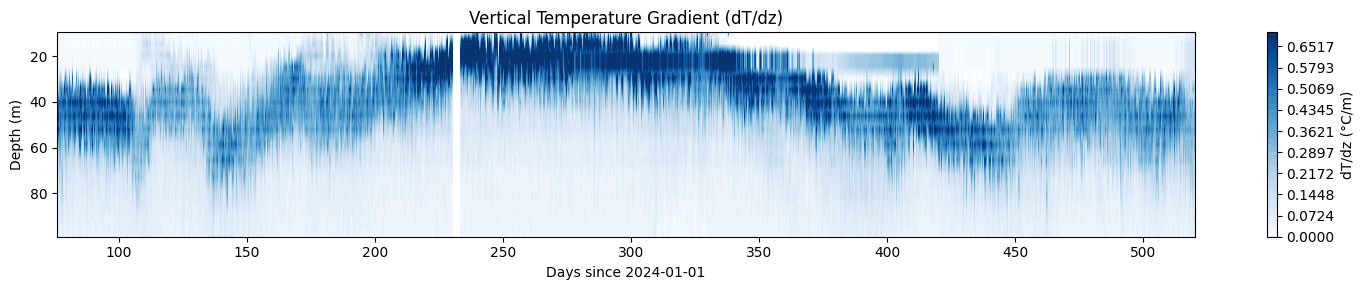

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Plot temp gradient 

# Calculate dT/dz
dtdz = np.empty((len(x), len(zc) - 1))
for iz in range(len(zc) - 1):
    dz = abs(zc[iz] - zc[iz + 1])
    dtdz[:, iz] = (tc[:, iz] - tc[:, iz + 1]) / dz

# Midpoint depths for plotting (between zc levels)
zc_mid = 0.5 * (zc[:-1] + zc[1:])


if np.issubdtype(x.dtype, np.datetime64):
    days_since_start = (x - np.datetime64('2024-01-01')).astype('timedelta64[D]').astype(int)
else:
    days_since_start = x  # assume already in days

# Create meshgrid for contourf
X, Z = np.meshgrid(days_since_start, zc_mid, indexing='ij')

# Plotting
fig, ax = plt.subplots(figsize=(15, 3))
cint = np.linspace(0, .7, 30)
c = ax.contourf(X, Z, dtdz, cmap='Blues', levels=cint)

# Invert Y-axis so depth increases downward
ax.invert_yaxis()

# Axis labels and title
ax.set_xlabel("Days since 2024-01-01")
ax.set_ylabel("Depth (m)")
ax.set_title("Vertical Temperature Gradient (dT/dz)")

# Colorbar on the right
cb = fig.colorbar(c, ax=ax, label="dT/dz (°C/m)")

plt.tight_layout()
plt.show()


# Richardson Number

## Calculating Richardson Number 

In [81]:
# Calculate the Richardson Number

# Variables

Ri = 0                          # Richardson number
g = 9.8                         # gravitational constant
dddz = dddz                     # vertical density gradient
density = density               # density 
shearsquare = shearsquare       # vertical shear squared 

density_mid = 0.5 * (density[:, :-1] + density[:, 1:])

# Set up equations

Ri = - ((g / density_mid) * dddz) / (shearsquare)

## Plotting Richardson Number 

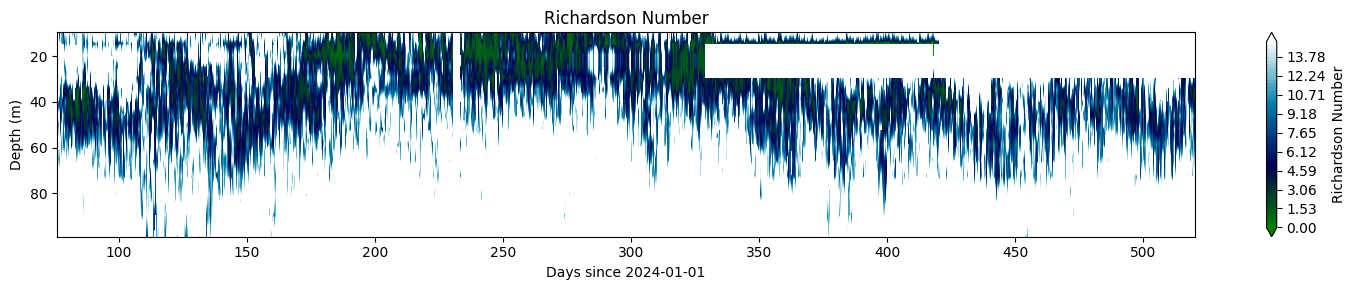

In [82]:
# Plotting Richardson number 

import numpy as np
import matplotlib.pyplot as plt

# Calculate mid-depths to match Ri shape
zc_mid = 0.5 * (zc[:-1] + zc[1:])  # Length should be 15

# Create the contour plot
plt.figure(figsize=(15, 3))
cint = np.linspace(0, 15, 50)
contour = plt.contourf(x_plot, zc_mid, Ri.T, levels=cint, cmap='ocean', extend='both')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Axis labels
plt.xlabel('Days since 2024-01-01')
plt.ylabel('Depth (m)')
plt.title('Richardson Number')

# Add color bar
cbar = plt.colorbar(contour)
cbar.set_label('Richardson Number')

# Show the plot
plt.tight_layout()
plt.show()


# Inertial Analysis 

## Intertial bandpass filter 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Set up intertial frequencies 
omega = 7.292e-5  # rad/s
lat_deg = 11.5
lat_rad = np.radians(lat_deg)
f_inertial = 2 * omega * np.sin(lat_rad)  # rad/s
T_inertial = 2 * np.pi / f_inertial       # seconds
T_inertial_hours = T_inertial / 3600      # ~58.8 hours


# get time between samples in hours 
dt_hours = (x_plot[1] - x_plot[0]) * 24
fs = 1 / dt_hours  # how many samples are taken per hour 

# convert high and low periods (T+-6) into frequencies to pass through filter 
lowcut = 1 / (T_inertial_hours + 6)  
highcut = 1 / (T_inertial_hours - 6)

# Butterworth band-pass filter
b, a = butter(N=4, Wn=[lowcut, highcut], btype='band', fs=fs)


## Plot Inertial Currents 

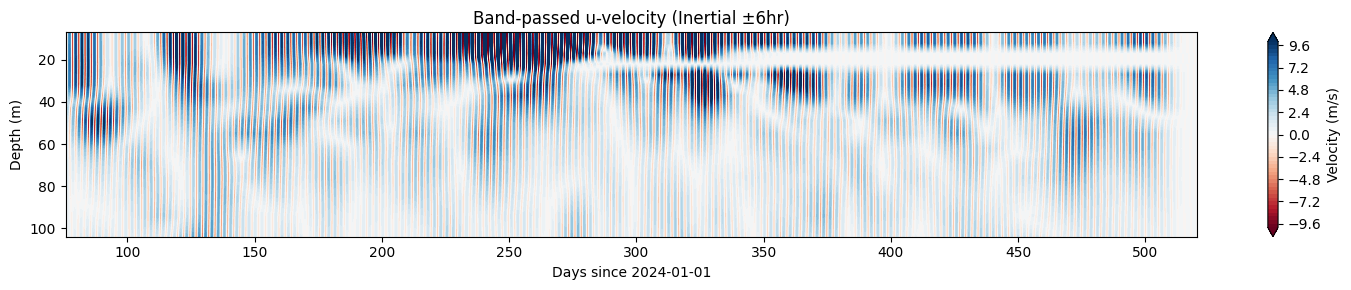

[[-4.102138996124268 -4.096726417541504 -4.09161376953125 ...
  -0.131551131606102 -0.3269501030445099 -0.3284701704978943]
 [-4.467249870300293 -4.460628509521484 -4.496304035186768 ...
  -0.0601484477519989 -0.2970520853996277 -0.3280808627605438]
 [-4.786002159118652 -4.7779412269592285 -4.8540496826171875 ...
  0.011350221931934357 -0.2639472484588623 -0.32365596294403076]
 ...
 [0.0017578337574377656 0.0021201358176767826 2.441263025065865e-10 ...
  -0.0010668881004676223 -0.0017603399464860559 -0.0018856435781344771]
 [0.0016136071644723415 0.0019401402678340673 2.553857680887006e-10 ...
  -0.0009218965424224734 -0.0016127570997923613 -0.0017447627615183592]
 [0.0014624593313783407 0.0017531152116134763 2.578561808519453e-10 ...
  -0.0007864870713092387 -0.001458612154237926 -0.0015926266787573695]]


In [84]:

u_clean = u.copy()

# Loop over each depth
for iz in range(u_clean.shape[1]):
    time_indices = np.arange(u_clean.shape[0])          # creates array with time indices
    valid = ~np.isnan(u_clean[:, iz])                   # Identify valid (non-NaN) data points
    
    if np.sum(valid) < 2:
        # Not enough valid points to interpolate, fill with zeros or leave as is
        u_clean[:, iz] = 0
        print("nah")
    else:
        # Interpolate over NaNs using valid data points
        u_clean[:, iz] = np.interp(time_indices, time_indices[valid], u_clean[valid, iz])

u_bandpassed = np.empty_like(u) # creates an empty array that holds the same amount and type of data as u

for iz in range(u_clean.shape[1]):  # loop over depth
    u_bandpassed[:, iz] = filtfilt(b, a, u_clean[:, iz])


plt.figure(figsize=(15, 3))
cint = np.linspace(-10, 10, 51)
contour = plt.contourf(x_plot, zc, u_bandpassed.T, levels=cint, cmap='RdBu', extend='both')
plt.gca().invert_yaxis()
plt.xlabel('Days since 2024-01-01')
plt.ylabel('Depth (m)')
plt.title('Band-passed u-velocity (Inertial ±6hr)')
plt.colorbar(contour, label='Velocity (m/s)')
plt.tight_layout()
plt.show()

print(u_bandpassed)


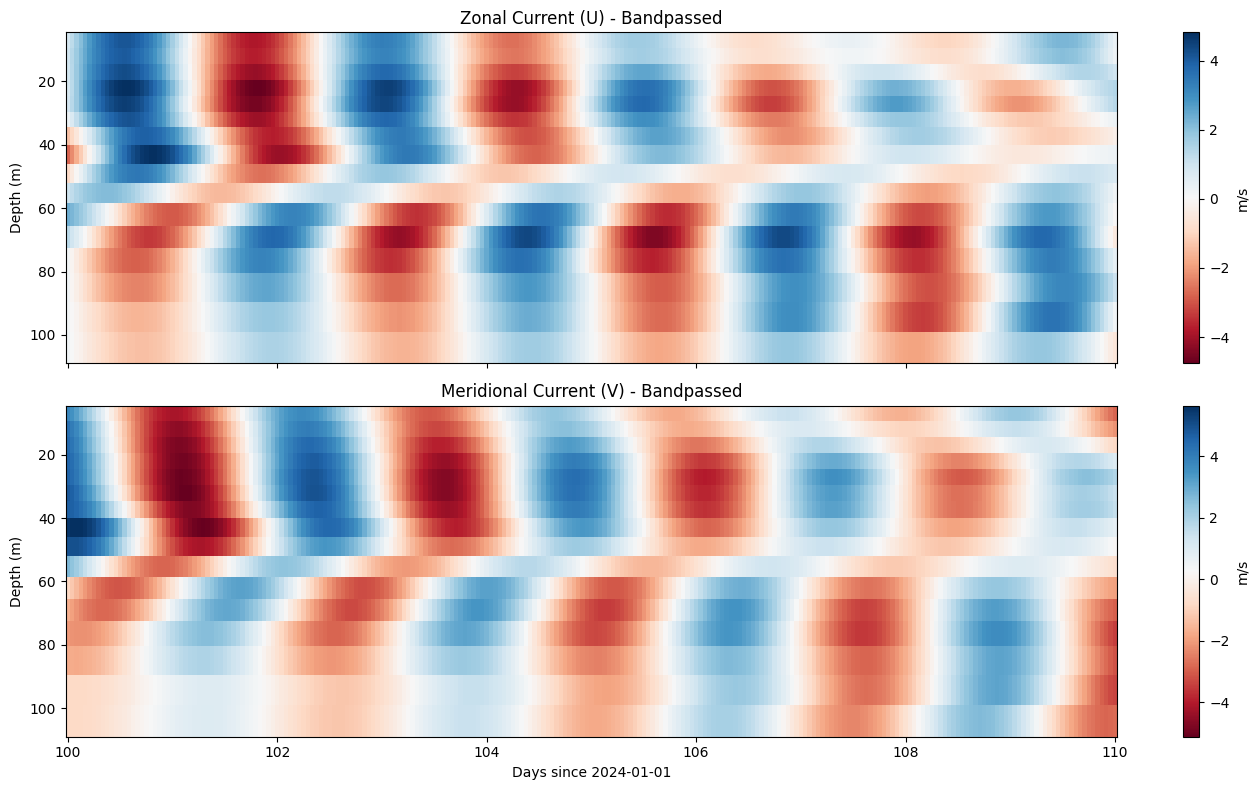

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Define time window (10 days)
start_day = 100
end_day = 110

# Get indices for that window
time_mask = (x_plot >= start_day) & (x_plot <= end_day)
x_short = x_plot[time_mask]

# Subset data
u_slice = u_bandpassed[time_mask, :]  # shape: (time, depth)
v_slice = v_bandpassed[time_mask, :]

# Transpose for plotting 
u_plot = u_slice.T  # shape: (depth, time)
v_plot = v_slice.T

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Zonal (U)
im1 = axs[0].pcolormesh(x_short, zc, u_plot, shading='auto', cmap='RdBu')
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()
axs[0].set_title('Zonal Current (U) - Bandpassed')
fig.colorbar(im1, ax=axs[0], label='m/s')

# Meridional (V)
im2 = axs[1].pcolormesh(x_short, zc, v_plot, shading='auto', cmap='RdBu')
axs[1].set_xlabel('Days since 2024-01-01')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()
axs[1].set_title('Meridional Current (V) - Bandpassed')
fig.colorbar(im2, ax=axs[1], label='m/s')

plt.tight_layout()
plt.show()


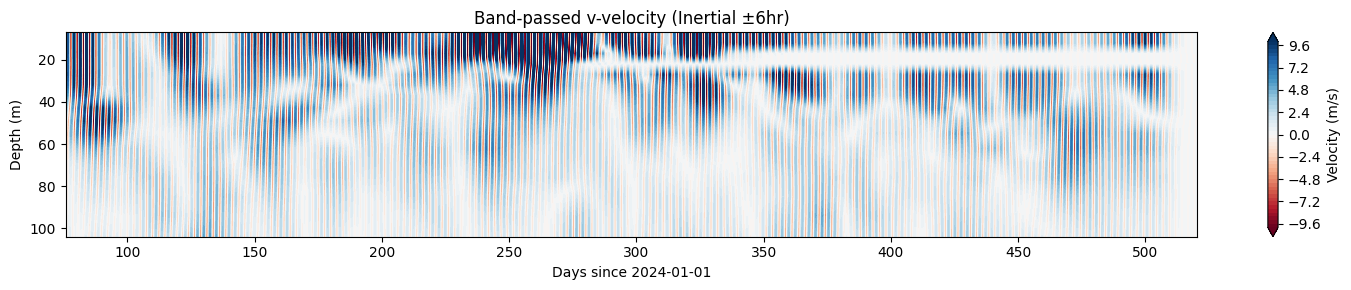

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Plot v through intertial filter 

v_clean = v.copy()

# Loop over each depth
for iz in range(v_clean.shape[1]):
    time_indices = np.arange(v_clean.shape[0])          # creates array with time indices
    valid = ~np.isnan(v_clean[:, iz])                   # Identify valid (non-NaN) data points
    
    if np.sum(valid) < 2:
        # Not enough valid points to interpolate, fill with zeros or leave as is
        v_clean[:, iz] = 0
        print("nah")
    else:
        # Interpolate over NaNs using valid data points
        v_clean[:, iz] = np.interp(time_indices, time_indices[valid], v_clean[valid, iz])

v_bandpassed = np.empty_like(v) # creates an empty array that holds the same amount and type of data as u

for iz in range(v_clean.shape[1]):  # loop over depth
    v_bandpassed[:, iz] = filtfilt(b, a, v_clean[:, iz])


plt.figure(figsize=(15, 3))
cint = np.linspace(-10, 10, 51)
contour = plt.contourf(x_plot, zc, v_bandpassed.T, levels=cint, cmap='RdBu', extend='both')
plt.gca().invert_yaxis()
plt.xlabel('Days since 2024-01-01')
plt.ylabel('Depth (m)')
plt.title('Band-passed v-velocity (Inertial ±6hr)')
plt.colorbar(contour, label='Velocity (m/s)')
plt.tight_layout()
plt.show()



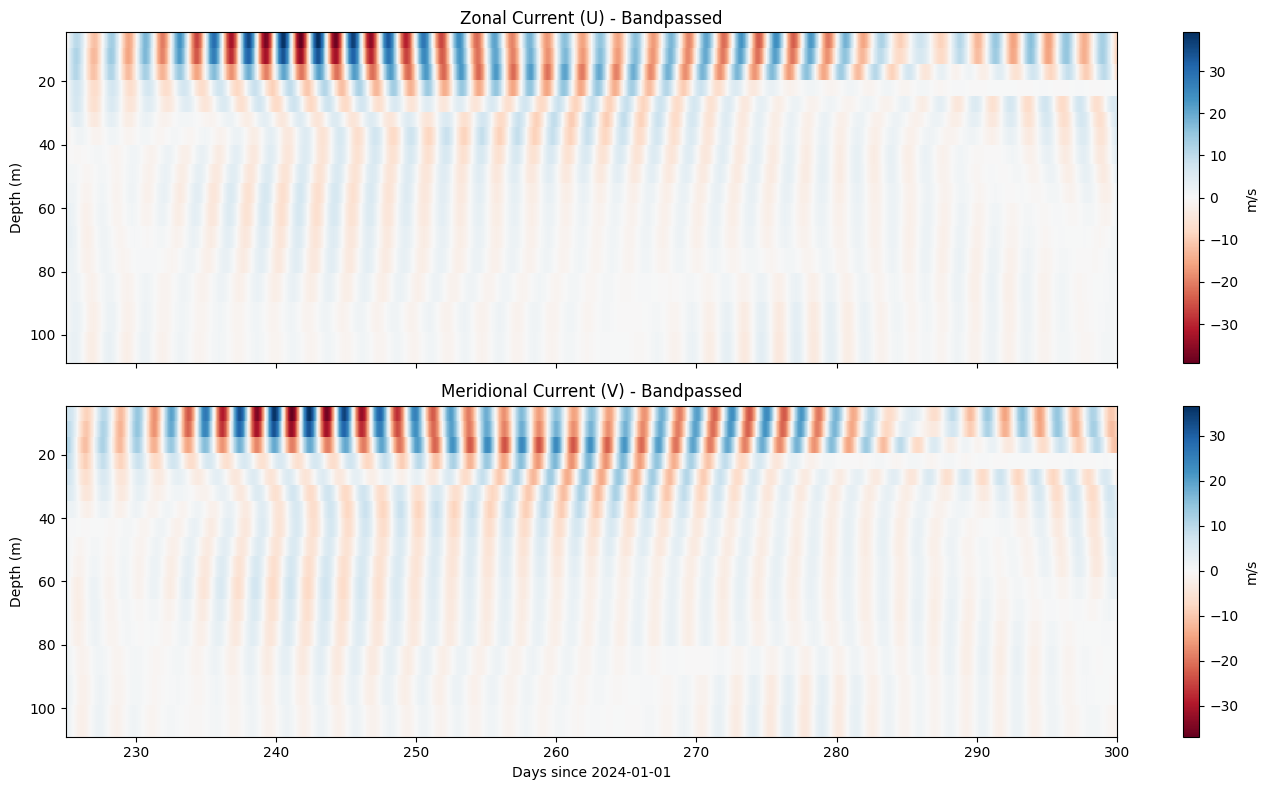

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define time window (10 days)
start_day = 225
end_day = 300

# Get indices for that window
time_mask = (x_plot >= start_day) & (x_plot <= end_day)
x_short = x_plot[time_mask]

# Subset data
u_slice = u_bandpassed[time_mask, :]  # shape: (time, depth)
v_slice = v_bandpassed[time_mask, :]

# Transpose for plotting (
u_plot = u_slice.T  # shape: (depth, time)
v_plot = v_slice.T

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Zonal (U)
im1 = axs[0].pcolormesh(x_short, zc, u_plot, shading='auto', cmap='RdBu')
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()
axs[0].set_title('Zonal Current (U) - Bandpassed')
fig.colorbar(im1, ax=axs[0], label='m/s')

# Meridional (V)
im2 = axs[1].pcolormesh(x_short, zc, v_plot, shading='auto', cmap='RdBu')
axs[1].set_xlabel('Days since 2024-01-01')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()
axs[1].set_title('Meridional Current (V) - Bandpassed')
fig.colorbar(im2, ax=axs[1], label='m/s')

plt.tight_layout()
plt.show()


## Calculate Intertial Standard Deviations 

In [ ]:
# Calculate Standard Deviations 

import numpy as np
import pandas as pd

# Convert time to pandas datetime for easier grouping 
if not np.issubdtype(x.dtype, np.datetime64):
    # If x is numeric days since 2024-01-01, convert:
    base_date = np.datetime64('2024-01-01')
    x_dates = base_date + x.astype('timedelta64[D]')
else:
    x_dates = x

# Extract just the date (drop time info) for grouping by day
x_days = pd.to_datetime(x_dates).normalize()

# Unique days in data
unique_days = np.unique(x_days)

n_depths = u_bandpassed.shape[1]           # create arrays to hold data 
n_days = len(unique_days)

# Initialize arrays to hold daily std dev at each depth
std_u_inertial = np.full((n_days, n_depths), np.nan)
std_v_inertial = np.full((n_days, n_depths), np.nan)

for i, day in enumerate(unique_days):                       # loop over each day 
    # Find indices for current day
    indices = np.where(x_days == day)[0]                    # keeps track of indices of values at this day 
    
    # Calculate std dev over raw data for this day, at each depth
    std_u_inertial[i, :] = np.nanstd(u_bandpassed[indices, :], axis=0)
    std_v_inertial[i, :] = np.nanstd(v_bandpassed[indices, :], axis=0)

# apply fillnan and low pass filter 
std_u_filled = fillnan_tacos_38W(unique_days, zc, std_u_inertial, 48)
std_v_filled = fillnan_tacos_38W(unique_days, zc, std_v_inertial, 48)

window_len = 5  # adjustable smoothing window length
std_u_smooth_inertial = lowpass_bartlett(std_u_filled, 24)
std_v_smooth_inertial = lowpass_bartlett(std_v_filled, 24)




### Plot inertial standard deviations

C:\Users\mia.case\AppData\Local\Temp\ipykernel_19312\1092891075.py:18: UserWarning: linewidths is ignored by contourf
  cs1 = axs[0].contourf(DATES, -DEPTHS, std_u_smooth_inertial.T, levels=levels, cmap=cmap, extend='max', linewidths=.1)


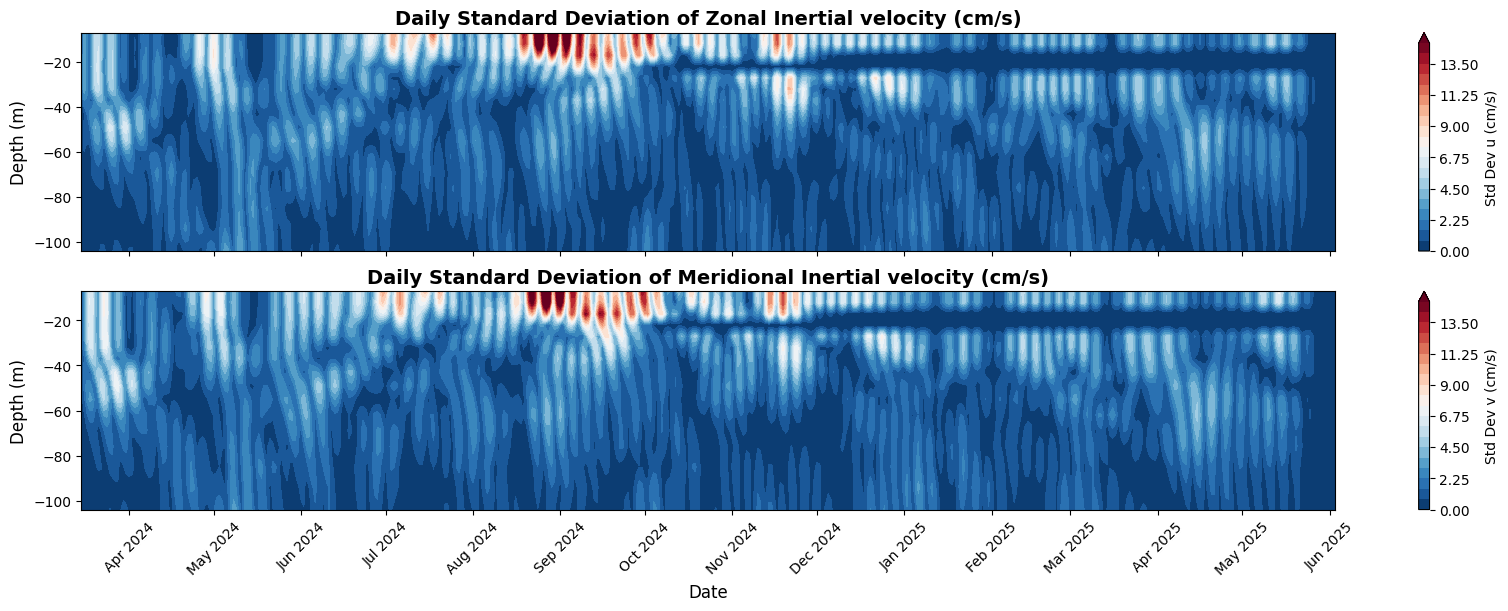

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

# Create meshgrid for plotting
DATES, DEPTHS = np.meshgrid(mdates.date2num(daily_dates), zc)

# Colormap and contour levels
cmap = plt.get_cmap('RdBu_r')
max_std = np.nanmax([std_u_smooth_inertial, std_v_smooth_inertial])
levels = np.linspace(0, 15, 21)

# Create figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 6), constrained_layout=True)

# Panel 1: Standard deviation of u
cs1 = axs[0].contourf(DATES, -DEPTHS, std_u_smooth_inertial.T, levels=levels, cmap=cmap, extend='max', linewidths=.1)
axs[0].set_ylabel('Depth (m)', fontsize=12)
axs[0].set_title('Daily Standard Deviation of Zonal Inertial velocity (cm/s)', fontsize=14, fontweight='bold')
axs[0].xaxis_date()
axs[0].set_ylim(-np.nanmax(zc), -np.nanmin(zc))
axs[0].tick_params(axis='x', labelbottom=False)
fig.colorbar(cs1, ax=axs[0], orientation='vertical', label='Std Dev u (cm/s)')

# Panel 2: Standard deviation of v
cs2 = axs[1].contourf(DATES, -DEPTHS, std_v_smooth_inertial.T, levels=levels, cmap=cmap, extend='max')
axs[1].set_ylabel('Depth (m)', fontsize=12)
axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_title('Daily Standard Deviation of Meridional Inertial velocity (cm/s)', fontsize=14, fontweight='bold')
axs[1].set_ylim(-np.nanmax(zc), -np.nanmin(zc))
fig.colorbar(cs2, ax=axs[1], orientation='vertical', label='Std Dev v (cm/s)')

# Format x-axis to show months and years
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.show()



## Inertial Current Composite

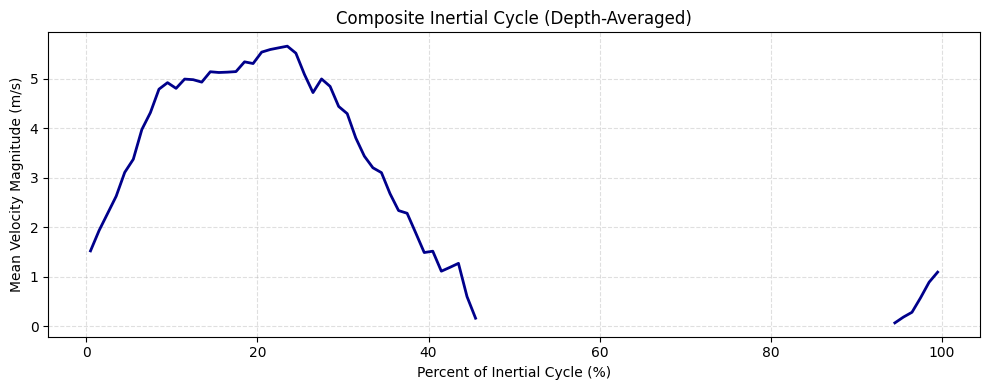

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Step 1: Calculate inertial current magnitude
uv_magnitude = np.sqrt(u_bandpassed**2 + v_bandpassed**2)

# Step 2: Use Hilbert transform to get phase of oscillation
analytic_signal = hilbert(uv_magnitude, axis=0)
phase = np.unwrap(np.angle(analytic_signal), axis=0)  # shape: (time, depth)

# Step 3: Convert phase to % of cycle
cycles = (phase - phase[0, :]) / (2 * np.pi)
cycle_percent = (cycles % 1) * 100  # shape: (time, depth)

# Step 4: Define phase bins and average magnitude across all depths per bin
n_bins = 100
bin_edges = np.linspace(0, 100, n_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
binned_mags = [[] for _ in range(n_bins)]

threshold = 0.05  # m/s — to exclude noise

# Loop over all time and depth points
for t in range(uv_magnitude.shape[0]):
    for z in range(uv_magnitude.shape[1]):
        mag = uv_magnitude[t, z]
        if mag < threshold or np.isnan(cycle_percent[t, z]):
            continue
        bin_idx = int(cycle_percent[t, z] * n_bins / 100) % n_bins
        binned_mags[bin_idx].append(mag)

# Compute average magnitude per phase bin
mean_mags = [np.mean(mags) if mags else np.nan for mags in binned_mags]

# Step 5: Plot
plt.figure(figsize=(10, 4))
plt.plot(bin_centers, mean_mags, color='darkblue', lw=2)
plt.xlabel('Percent of Inertial Cycle (%)')
plt.ylabel('Mean Velocity Magnitude (m/s)')
plt.title('Composite Inertial Cycle (Depth-Averaged)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



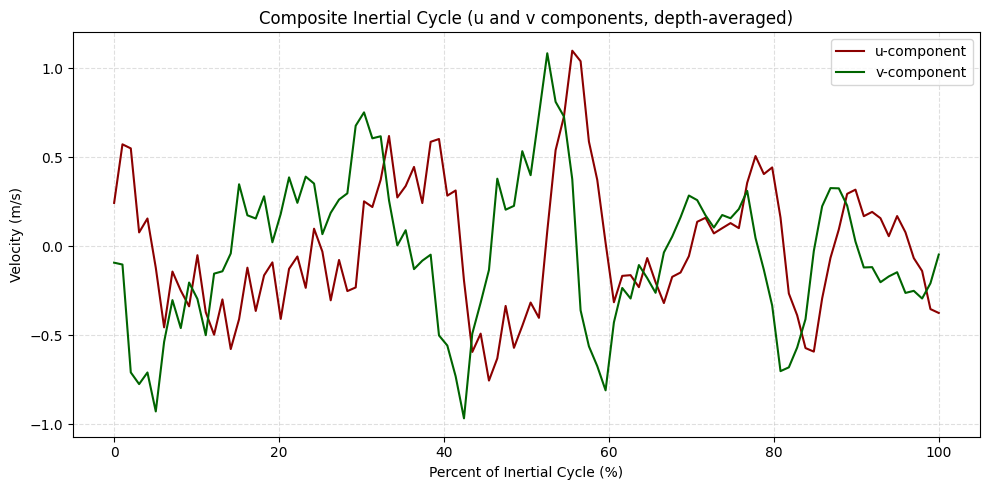

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.interpolate import interp1d

# Step 1: Average over depth
u_avg = np.nanmean(u_bandpassed, axis=1)
v_avg = np.nanmean(v_bandpassed, axis=1)
uv_mag = np.sqrt(u_avg**2 + v_avg**2)

# Step 2: Hilbert transform on magnitude to get phase
analytic = hilbert(uv_mag)
phase = np.unwrap(np.angle(analytic))

# Step 3: Identify full cycles based on 2π phase increments
cycle_starts = np.where(np.diff(np.floor(phase / (2 * np.pi))))[0]

# Step 4: Interpolate each cycle to fixed number of points (e.g., 100)
n_phase_bins = 100
u_cycles = []
v_cycles = []

threshold = 0.05  # m/s minimum magnitude for valid cycles

for i in range(len(cycle_starts) - 1):
    start = cycle_starts[i]
    end = cycle_starts[i + 1]

    if end - start < 0.5 * n_phase_bins:  # skip very short cycles
        continue

    u_seg = u_avg[start:end]
    v_seg = v_avg[start:end]
    mag_seg = uv_mag[start:end]

    if np.nanmax(mag_seg) < threshold:
        continue  # skip weak cycles

    # Normalize time from 0 to 1 and interpolate to fixed points
    t = np.linspace(0, 1, len(u_seg))
    t_interp = np.linspace(0, 1, n_phase_bins)

    try:
        u_interp = interp1d(t, u_seg, kind='linear')(t_interp)
        v_interp = interp1d(t, v_seg, kind='linear')(t_interp)
    except Exception:
        continue  # skip bad interpolations

    u_cycles.append(u_interp)
    v_cycles.append(v_interp)

# Step 5: Average over all valid cycles
u_composite = np.nanmean(np.array(u_cycles), axis=0)
v_composite = np.nanmean(np.array(v_cycles), axis=0)
percent_phase = np.linspace(0, 100, n_phase_bins)

# Step 6: Plot
plt.figure(figsize=(10, 5))

plt.plot(percent_phase, u_composite, label='u-component', color='darkred')
plt.plot(percent_phase, v_composite, label='v-component', color='darkgreen')
plt.xlabel('Percent of Inertial Cycle (%)')
plt.ylabel('Velocity (m/s)')
plt.title('Composite Inertial Cycle (u and v components, depth-averaged)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Surface Analysis 

## Read in Data 

In [86]:

# Read in  surface data from TACOS mooring

import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set file path
# Define the file path
file_path_surf = r'C:\Users\mia.case\internship\code\TACOSsurfacedata.nc'

# open file
surf = netCDF4.Dataset(file_path_surf, 'r')

# display variables
print(surf.variables)

# Read in variables
time_surf = surf.variables['TIME'][:]

uwind = surf.variables['UWND'][:]               # zonal wind in m/s @ 4 meters from surface 

vwind = surf.variables['VWND'][:]               # meridional wind in m/s @ 4 meters from surface

wind_spd = surf.variables['WSPD'][:]            # scalar wind speed in m/s @ 4 meters from surface 

wind_dir = surf.variables['WDIR'][:]            # wind directions in degrees @ 4 meters from surface 

hwind = surf.variables['HEIGHT_WIND'][:]        # wind height in meters - this is just 4

gust = surf.variables['WGUST'][:]               # speed of wind gust in m/s @ 4m from surface 

h_air = surf.variables['HEIGHT_AIRT'][:]        # height of air temp measurements in m pretty sure this is just 3 

t_air = surf.variables['AIRT'][:]               # air temp in celisius @ 3 m from surface 

air_pres = surf.variables['ATMP'][:]            # air pressure in hPa @ 3 m from surface 





# Close the file
#nc.close()



print(hwind)

{'TIME': <class 'netCDF4.Variable'>
float64 TIME(TIME)
    long_name: time
    standard_name: time
    units: days since 1950-01-01T00:00:00Z
    valid_min: 27102.791666666668
    valid_max: 27549.333333333332
    point_spacing: even
    QC_indicator: 1
    QC_procedure: 1
    uncertainty: None
    axis: T
unlimited dimensions: TIME
current shape = (10718,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'LATITUDE': <class 'netCDF4.Variable'>
float32 LATITUDE(LATITUDE)
    long_name: anchor latitude
    standard_name: latitude
    units: degrees_north
    valid_min: -90
    valid_max: 90
    QC_indicator: 0
    QC_procedure: 1
    uncertainty: None
    axis: Y
    reference: WGS84
    coordinate_reference_frame: urn:ogc:crs:EPSG::4326
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'LONGITUDE': <class 'netCDF4.Variable'>
float32 LONGITUDE(LONGITUDE)
    long_name: anchor longitude
    standard_name: longitude
    u

## Plot Wind 

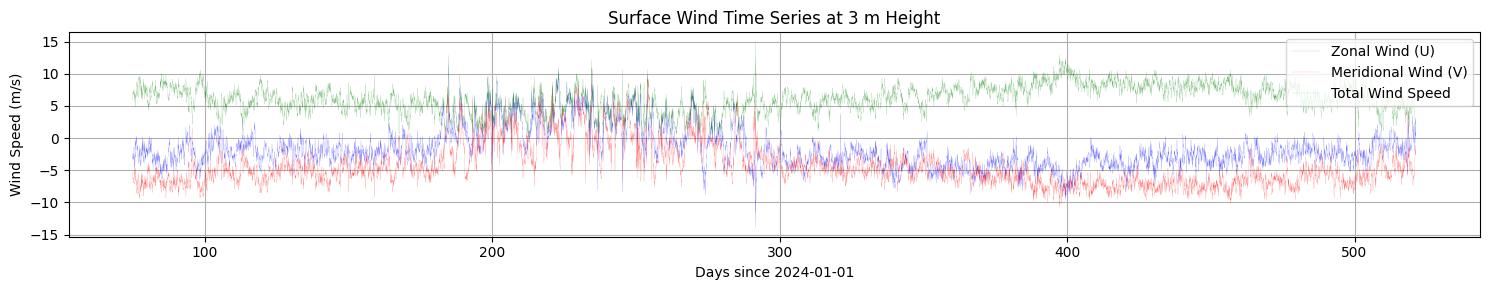

In [87]:
# Convert to days since 2024-01-01
t0_1950 = datetime(1950, 1, 1)
t0_2024 = datetime(2024, 1, 1)
days_offset = (t0_2024 - t0_1950).days
time_days_2024 = time_surf - days_offset

# Plot all three on the same figure
plt.figure(figsize=(15, 3))

plt.plot(time_days_2024, uwind, label='Zonal Wind (U)', color='blue', linestyle='-', linewidth=.07)
plt.plot(time_days_2024, vwind, label='Meridional Wind (V)', color='red', linestyle='-', linewidth=.07)
plt.plot(time_days_2024, wind_spd, label='Total Wind Speed', color='green', linestyle='-', linewidth=.07)

plt.xlabel('Days since 2024-01-01')
plt.ylabel('Wind Speed (m/s)')
plt.title('Surface Wind Time Series at 3 m Height')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculate Inertial Wind Work 

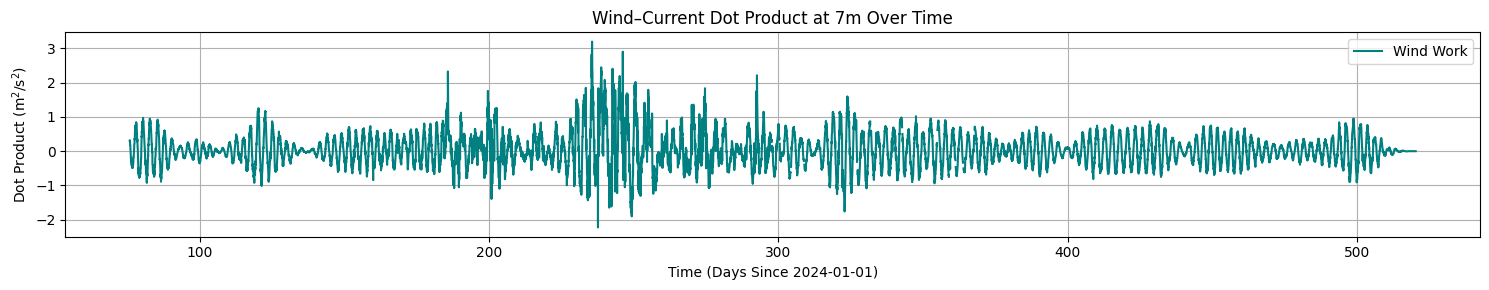

In [92]:
# calculate inertial wind work 

# variables 

u_surf = u_bandpassed[:, 0]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 0] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Plot
plt.figure(figsize=(15, 3))
plt.plot(x_plot, wind_work, label='Wind Work', color='teal')
plt.xlabel('Time (Days Since 2024-01-01)')
plt.ylabel(r'Dot Product (m$^2$/s$^2$)')
plt.title('Wind–Current Dot Product at 7m Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

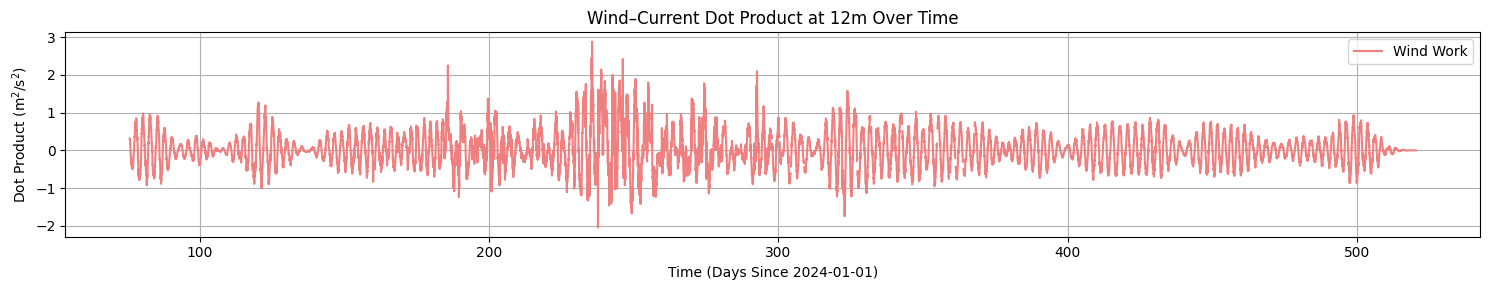

In [93]:
# calculate inertial wind work 

# variables 

u_surf = u_bandpassed[:, 1]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 1] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Plot
plt.figure(figsize=(15, 3))
plt.plot(x_plot, wind_work, label='Wind Work', color='lightcoral')
plt.xlabel('Time (Days Since 2024-01-01)')
plt.ylabel(r'Dot Product (m$^2$/s$^2$)')
plt.title('Wind–Current Dot Product at 12m Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

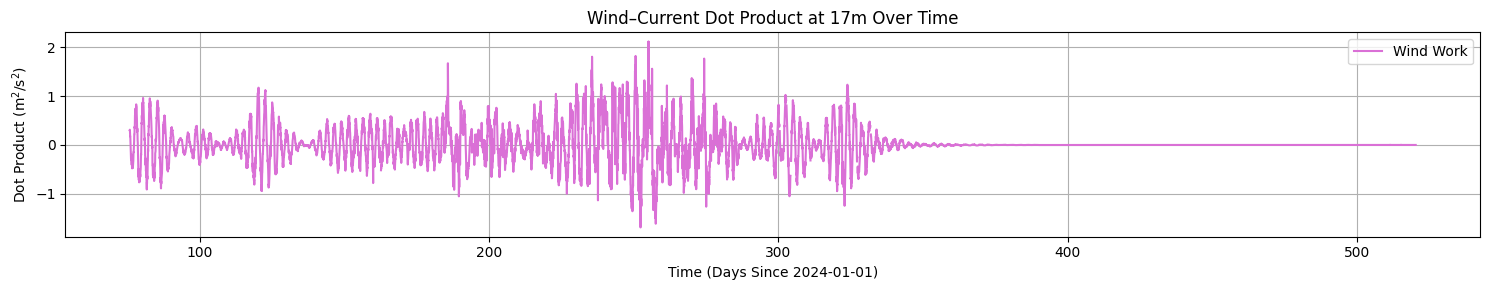

[0.3015877164440883 0.31140506798201384 0.3066098885263705 ...
 -2.46400198023646e-11 -2.1751764404391806e-11 -1.883159250898331e-11]


In [94]:
# calculate inertial wind work 

# variables 

u_surf = u_bandpassed[:, 2]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 2] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Plot
plt.figure(figsize=(15, 3))
plt.plot(x_plot, wind_work, label='Wind Work', color='orchid')
plt.xlabel('Time (Days Since 2024-01-01)')
plt.ylabel(r'Dot Product (m$^2$/s$^2$)')
plt.title('Wind–Current Dot Product at 17m Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(wind_work)


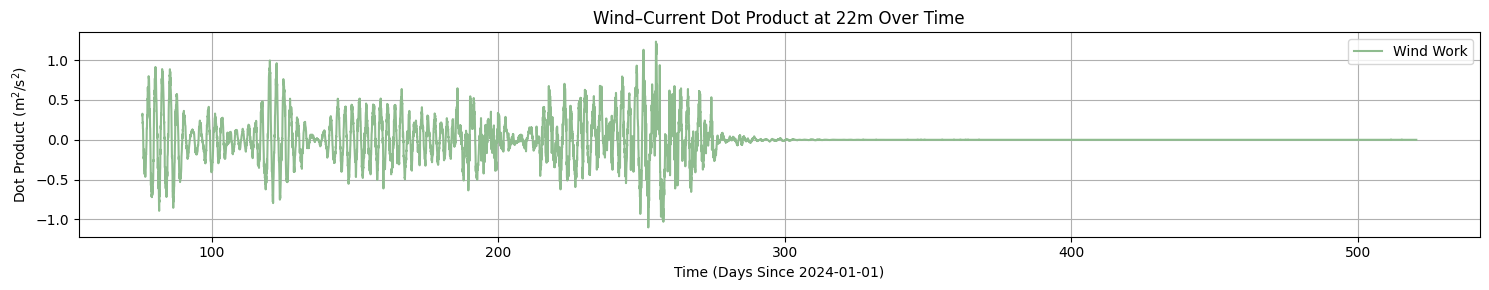

[0.30790255778515413 0.3245039141441907 0.32742275387218683 ...
 -7.156291668761105e-12 -6.345272664292598e-12 -6.404513299312832e-12]


In [95]:
# calculate inertial wind work 

# variables 

u_surf = u_bandpassed[:, 3]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 3] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Plot
plt.figure(figsize=(15, 3))
plt.plot(x_plot, wind_work, label='Wind Work', color='darkseagreen')
plt.xlabel('Time (Days Since 2024-01-01)')
plt.ylabel(r'Dot Product (m$^2$/s$^2$)')
plt.title('Wind–Current Dot Product at 22m Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(wind_work)


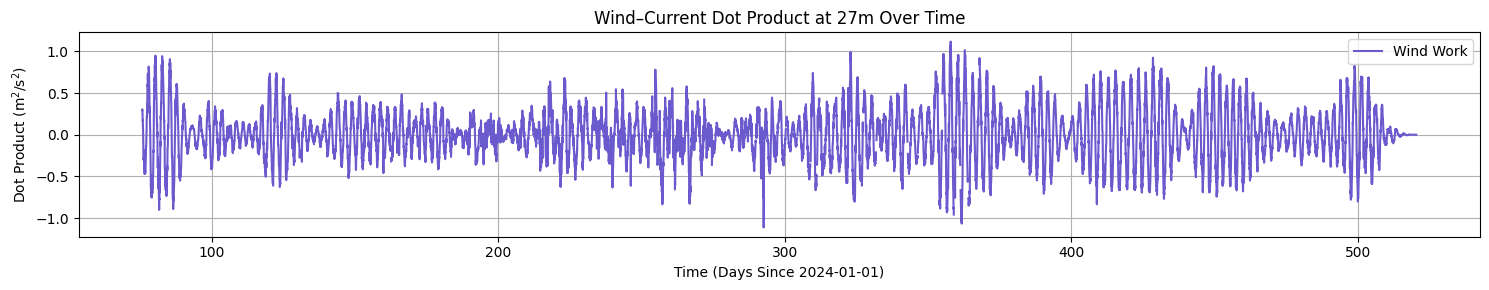

[0.29481900096564 0.30441622063723345 0.2996691638617983 ...
 9.191993566642907e-06 1.1590974879428509e-05 3.969132198260117e-05]


In [96]:
# calculate inertial wind work 

# variables 

u_surf = u_bandpassed[:, 4]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 4] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Plot
plt.figure(figsize=(15, 3))
plt.plot(x_plot, wind_work, label='Wind Work', color='slateblue')
plt.xlabel('Time (Days Since 2024-01-01)')
plt.ylabel(r'Dot Product (m$^2$/s$^2$)')
plt.title('Wind–Current Dot Product at 27m Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(wind_work)


In [97]:
# Determine number of data in each variable 
for var_name in ['TEMP', 'DEPTH', 'TIME']:
        if var_name in nc.variables:
            var = nc.variables[var_name]
            shape = var.shape
            num_elements = var.size  # Total number of elements (product of dimensions)
            print(f"{var_name}: Shape = {shape}, Total elements = {num_elements}")
        else:
            print(f"{var_name} not found in the file.")

TEMP: Shape = (10670, 16), Total elements = 170720
DEPTH: Shape = (16,), Total elements = 16
TIME: Shape = (10670,), Total elements = 10670


In [98]:
# Print dataset variable list
print(nc.variables)
print(zc)

{'TIME': <class 'netCDF4.Variable'>
float64 TIME(TIME)
    long_name: time
    standard_name: time
    units: days since 1950-01-01T00:00:00Z
    valid_min: 27102.791666666668
    valid_max: 27547.333333333332
    point_spacing: even
    QC_indicator: 1
    QC_procedure: 1
    uncertainty: None
    axis: T
unlimited dimensions: TIME
current shape = (10670,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'DEPTH': <class 'netCDF4.Variable'>
float32 DEPTH(DEPTH)
    long_name: depth of each measurement
    standard_name: depth
    units: meters
    positive: down
    valid_min: 0
    valid_max: 550
    QC_indicator: 7
    QC_procedure: 0
    uncertainty: 0.25
    axis: Z
    reference: sea_level
    coordinate_reference_frame: urn:ogc:crs:EPSG::5113
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'LATITUDE': <class 'netCDF4.Variable'>
float32 LATITUDE(LATITUDE)
    long_name: anchor latitude
    standard_name: latit

In [99]:
# Find the index of the depth closest to 49 m
target_depth = 49
depth_index = np.argmin(np.abs(zc - target_depth))

# Extract pressures at that depth over all time steps
pressure_at_49m = p[:, depth_index]

# Print the values
print(f"Pressure at ~{zc[depth_index]:.1f} m (closest to 49 m):")
print(pressure_at_49m)


Pressure at ~49.0 m (closest to 49 m):
[49.2869987487793 49.263999938964844 49.349998474121094 ...
 49.40599822998047 49.41400146484375 49.45800018310547]


# Wind - NIE Correlation

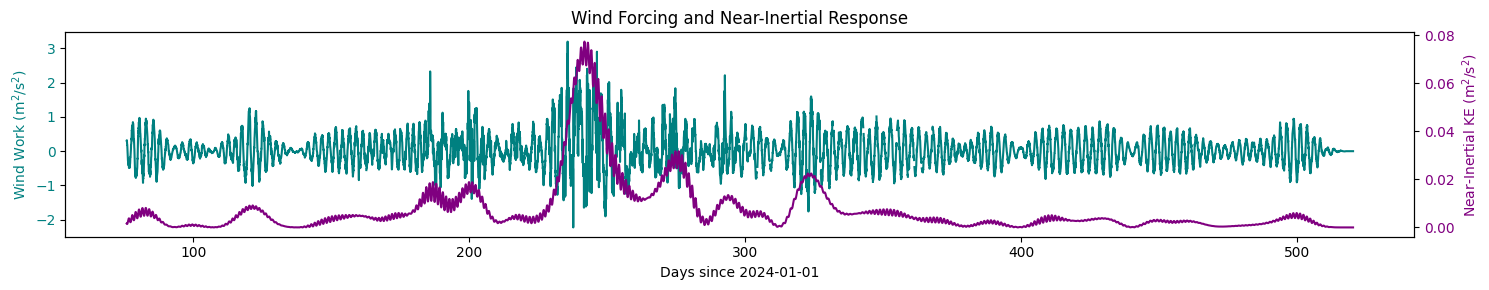

In [ ]:

u_surf = u_bandpassed[:, 0]     # intertial currents at the shallowest depth
v_surf = v_bandpassed[:, 0] 
u_surf = u_surf / 100.0         # convert to m/s
v_surf = v_surf / 100.0    
short_uwind = uwind[:10670]
short_vwind = vwind[:10670]

wind_work = (short_uwind * u_surf) + (short_vwind * v_surf)         # calculate the dot products 


# Near-inertial kinetic energy at the surface
NIKE = 0.5 * (u_surf**2 + v_surf**2)

fig, ax1 = plt.subplots(figsize=(15, 3))

ax1.plot(x_plot, wind_work, color='teal', label='Wind Work')
ax1.set_ylabel(r'Wind Work (m$^2$/s$^2$)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.plot(x_plot, NIKE, color='purple', label='NI KE')
ax2.set_ylabel(r'Near-Inertial KE (m$^2$/s$^2$)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

ax1.set_xlabel('Days since 2024-01-01')
ax1.set_title('Wind Forcing and Near-Inertial Response')

fig.tight_layout()
plt.show()


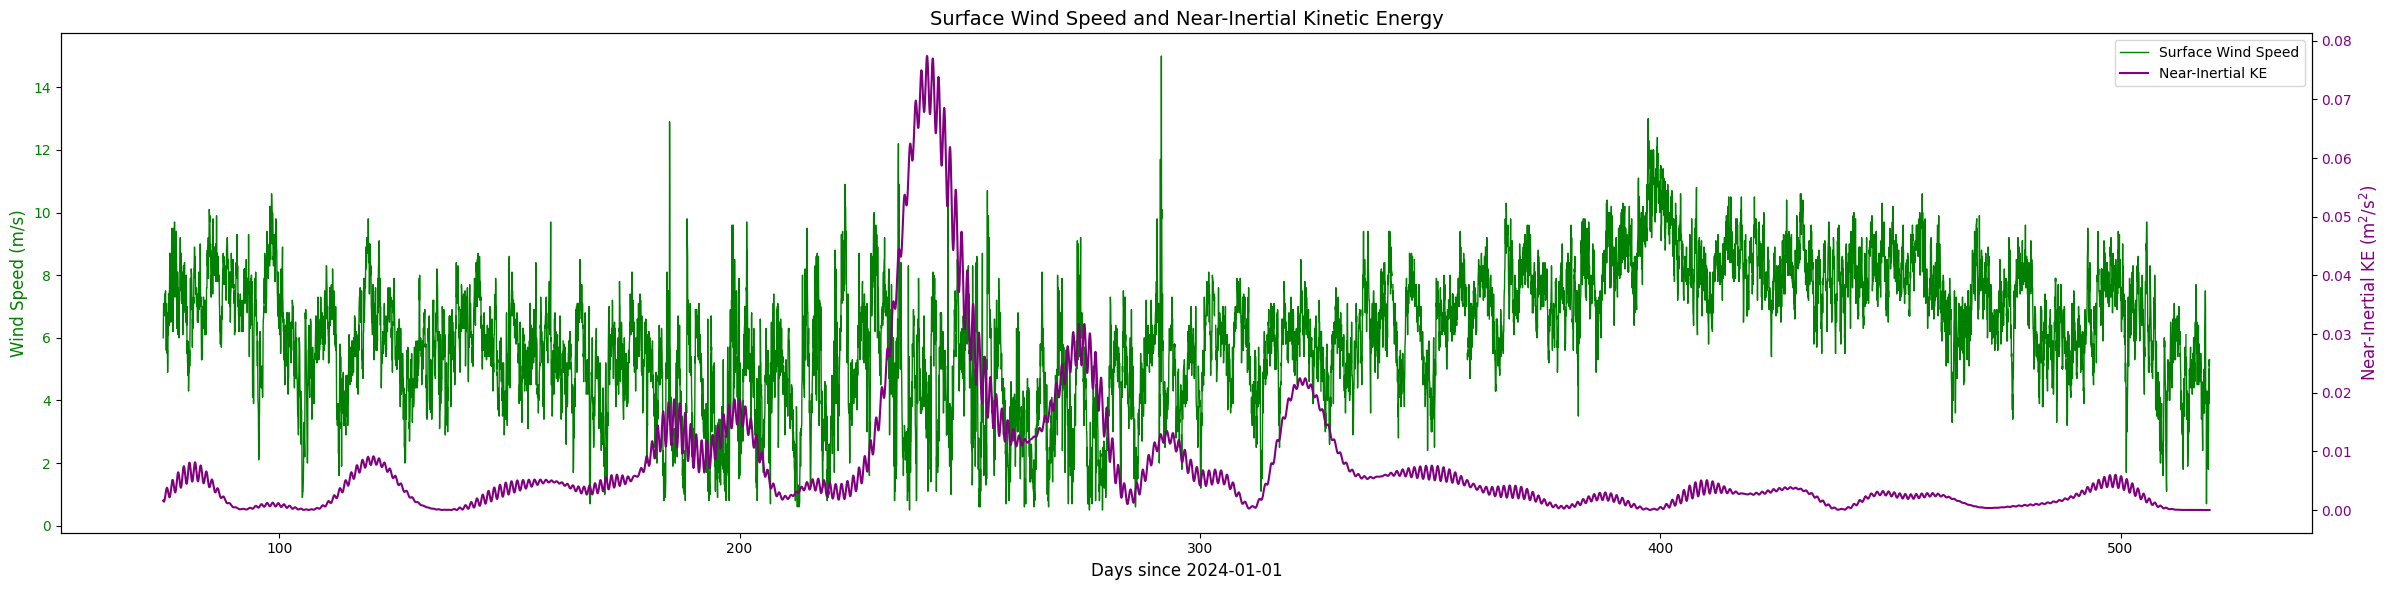

In [118]:
wind_spd_short = wind_spd[:len(NIKE)]
time_short = time_days_2024[:len(NIKE)]

fig, ax1 = plt.subplots(figsize=(24, 6))

# Wind speed 
ax1.plot(time_short, wind_spd_short,
         color='green', linewidth=1, label='Surface Wind Speed')
ax1.set_ylabel('Wind Speed (m/s)', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')

# Near-inertial response
ax2 = ax1.twinx()
ax2.plot(time_short, NIKE,
         color='purple', linewidth=1.5, label='Near-Inertial KE')
ax2.set_ylabel(r'Near-Inertial KE (m$^2$/s$^2$)', color='purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='purple')

ax1.set_xlabel('Days since 2024-01-01', fontsize=12)
ax1.set_title('Surface Wind Speed and Near-Inertial Kinetic Energy', fontsize=14)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

fig.tight_layout()
plt.show()


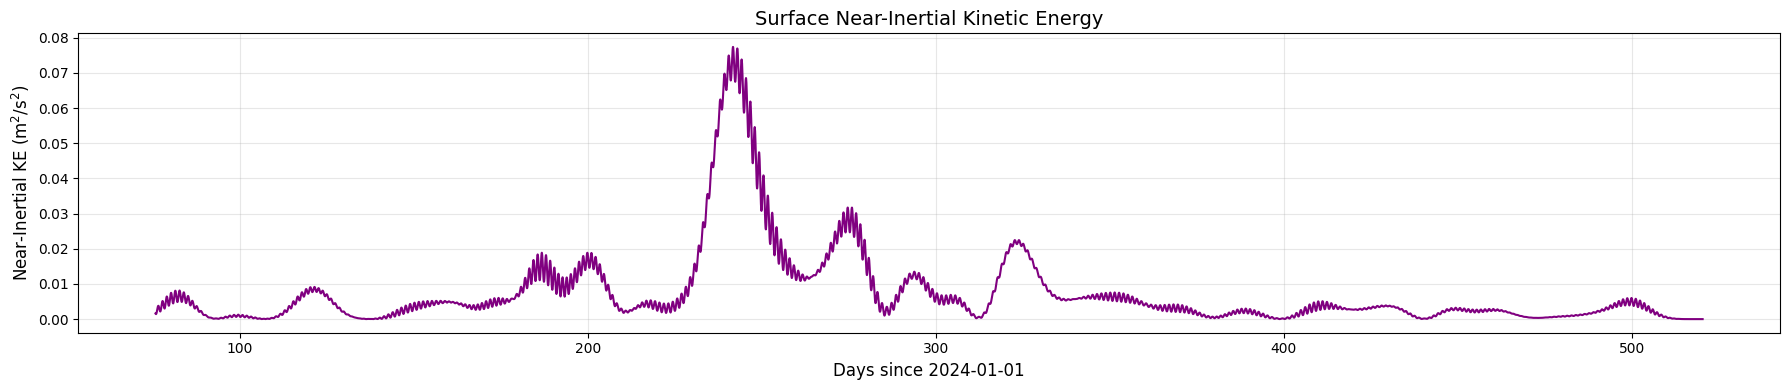

In [121]:
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 4))
plt.plot(x_plot, NIKE, color='purple', linewidth=1.5)

plt.xlabel('Days since 2024-01-01', fontsize=12)
plt.ylabel(r'Near-Inertial KE (m$^2$/s$^2$)', fontsize=12)
plt.title('Surface Near-Inertial Kinetic Energy', fontsize=14)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

